In [1]:
# Initialize notebook 

# %matplotlib notebook
%matplotlib widget

import numpy as np
import math
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from matplotlib.widgets import RectangleSelector
import matplotlib.ticker as ticker
from mpl_toolkits.mplot3d import Axes3D
import os
import re
import scipy.io as si
import scipy.signal as ss
from scipy.interpolate import RegularGridInterpolator as RGI
from time import time, localtime, strftime
from datetime import date
import gdspy
from shapely import Polygon as shapepoly
from PIL import Image
from imageio import imread as imreader
import cv2
from scipy.fftpack import fft2
import plotly
from shapely import LineString, Point
from matplotlib.patches import Polygon as poly

import tifffile as tif
from xrayutilities.io import spec
# import cmath
from matplotlib import cm
import imutils as imu
from PIL import Image as pim

import h5py as h5
from skimage.restoration import unwrap_phase

# from xraylib import *
import xraylib as xb

from multiprocessing import Pool, cpu_count
from functools import partial
from function_test import *

from IPython.display import display

from ipywidgets import interact,widgets,Box

import sys
sys.path.append('/nsls2/users/ccheu/')
from Functions_File_Operation import *
from Functions_General_Geometry import *
from Functions_General_Algebra import *
from Functions_BCDI_DataProc import *
from Functions_Crystallography import *

# del Pool, cpu_count

Eqtools.trispline() is not available !


In [2]:
xstart = 3600
xend = 4000
ystart = 4000
yend = 4500

In [3]:
test = gdspy.GdsLibrary(infile = 'Test_GDS_for_GISAXS.gds')
cell = test.top_level()[0]
polys = cell.get_polygons(by_spec = True)
#polys

In [4]:
bound = cell.get_bounding_box()
bound

array([[30788. ,  2416.5],
       [39818. , 11446.5]])

In [5]:
diff = bound[:,None] - bound[None,:]
diff

array([[[    0.,     0.],
        [-9030., -9030.]],

       [[ 9030.,  9030.],
        [    0.,     0.]]])

In [6]:
diff[0][1][1]*diff[0][1][0]

81540900.0

In [7]:
xsize = 1
ysize = 1

(0.0, 9030.0, 0.0, 9030.0)

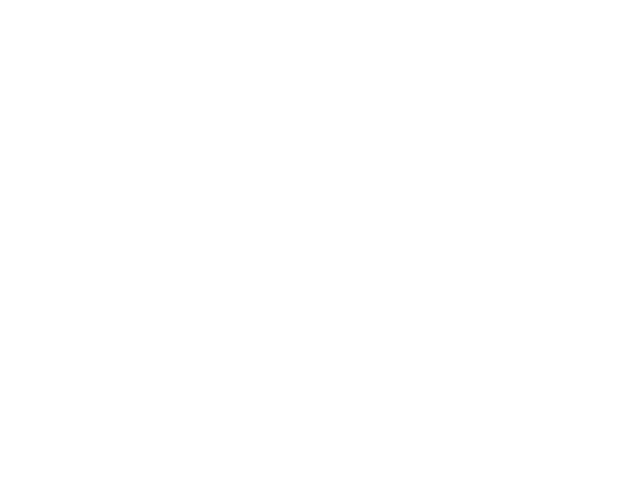

In [8]:
plt.clf()
plt.ioff()
fig = plt.figure(figsize = (diff[1][0][0]//(5*xsize),diff[1][0][1]//(5*ysize)),frameon = False)
ax = fig.add_subplot();
plt.xlim(0,diff[1][0][0]//xsize)
plt.ylim(0,diff[1][0][1]//ysize)

plt.axis('off')

#plt.show()

In [9]:
count = 0
#for a,coords in polys.items():
#    colors = ['black','red','blue','magenta','green','orange']
#    for b in coords:
#        m = Polygon(b)
#        ax.fill(*m.exterior.xy,color = colors[count])
#    count += 1

for a,coords in polys.items():
    colors = ['black','red','blue','magenta','green','orange']
    for b in coords:
        m = Polygon(b)
        t = np.array(m.exterior.xy)
        adjust = t - np.tile(np.array([[bound[0][0],bound[0][1]]]).transpose(),(1,t.shape[1]))
        scaled = adjust//np.array([[xsize, ysize]]).transpose()
        #print(scaled)
        cor = Polygon(list(zip(scaled[0],scaled[1])))
        ax.fill(*cor.exterior.xy,color = colors[count])
    count +=1
    print(count)


#selector = RectangleSelector(ax,clicker,useblit = True,button = [1,3],spancoords = 'pixels',interactive = True)
#fig.canvas.mpl_connect('key_press_event',toggler)
plt.savefig('test.png',dpi = 10)

1
2
3
4
5


In [9]:
colors = ['black','red','blue','magenta','green','orange']

In [10]:
count = 0

In [11]:
count = 0
for a,coords in polys.items():
    fig2 = plt.figure(figsize = (diff[1][0][0]/100,diff[1][0][1]/100),frameon = False)
    plt.xlim(bound[0][0],bound[1][0])
    plt.ylim(bound[0][1],bound[1][1])


    ax2 = fig2.add_subplot()
    for b in coords:
        m = Polygon(b)
        ax2.fill(*m.exterior.xy,color = colors[count])
    fig2.savefig('testlayer'+str(count)+'.png',dpi = 100)

In [8]:
count = 0
imglist = ()
for a,coords in polys.items():
    colors = ['black','red','blue','magenta','green','orange']
    fig2 = plt.figure(figsize = (diff[1][0][0]/(xsize),diff[1][0][1]/(ysize)),frameon = False)
    ax2 = fig2.add_subplot()
    plt.xlim(0,diff[1][0][0]//xsize)
    plt.ylim(0,diff[1][0][1]//ysize)
    
    plt.axis('off')

    for b in coords:
        m = shapepoly(b)
        t = np.array(m.exterior.xy)
        adjust = t - np.tile(np.array([[bound[0][0],bound[0][1]]]).transpose(),(1,t.shape[1]))
        scaled = np.matrix.round(adjust/np.array([[xsize, ysize]]).transpose())
        #print(scaled)
        cor = poly(list(zip(scaled[0],scaled[1])),edgecolor = 'r',facecolor = 'none',linewidth = 100)
        #x,y = cor.exterior.xy
        #print(x[0])
        ax2.add_patch(cor)
    count +=1
#    print(count)
    fig2.savefig('testlayer'+str(count)+'.png',dpi = 1,edgecolor = 'r')
    imglist += ('testlayer'+str(count)+'.png',)
    plt.close()

In [29]:
testmat = np.frombuffer(fig.canvas.tostring_rgb(),dtype = np.uint8)

/tmp/ipykernel_952828/388376909.py:1: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use buffer_rgba instead.
  testmat = np.frombuffer(fig.canvas.tostring_rgb(),dtype = np.uint8)


In [30]:
testmat2 = testmat.reshape(int(np.sqrt(len(testmat))), int(np.sqrt(len(testmat))),1)

ValueError: cannot reshape array of size 121500000 into shape (11022,11022,1)

In [31]:
diff[0][1]

array([-9030., -9030.])

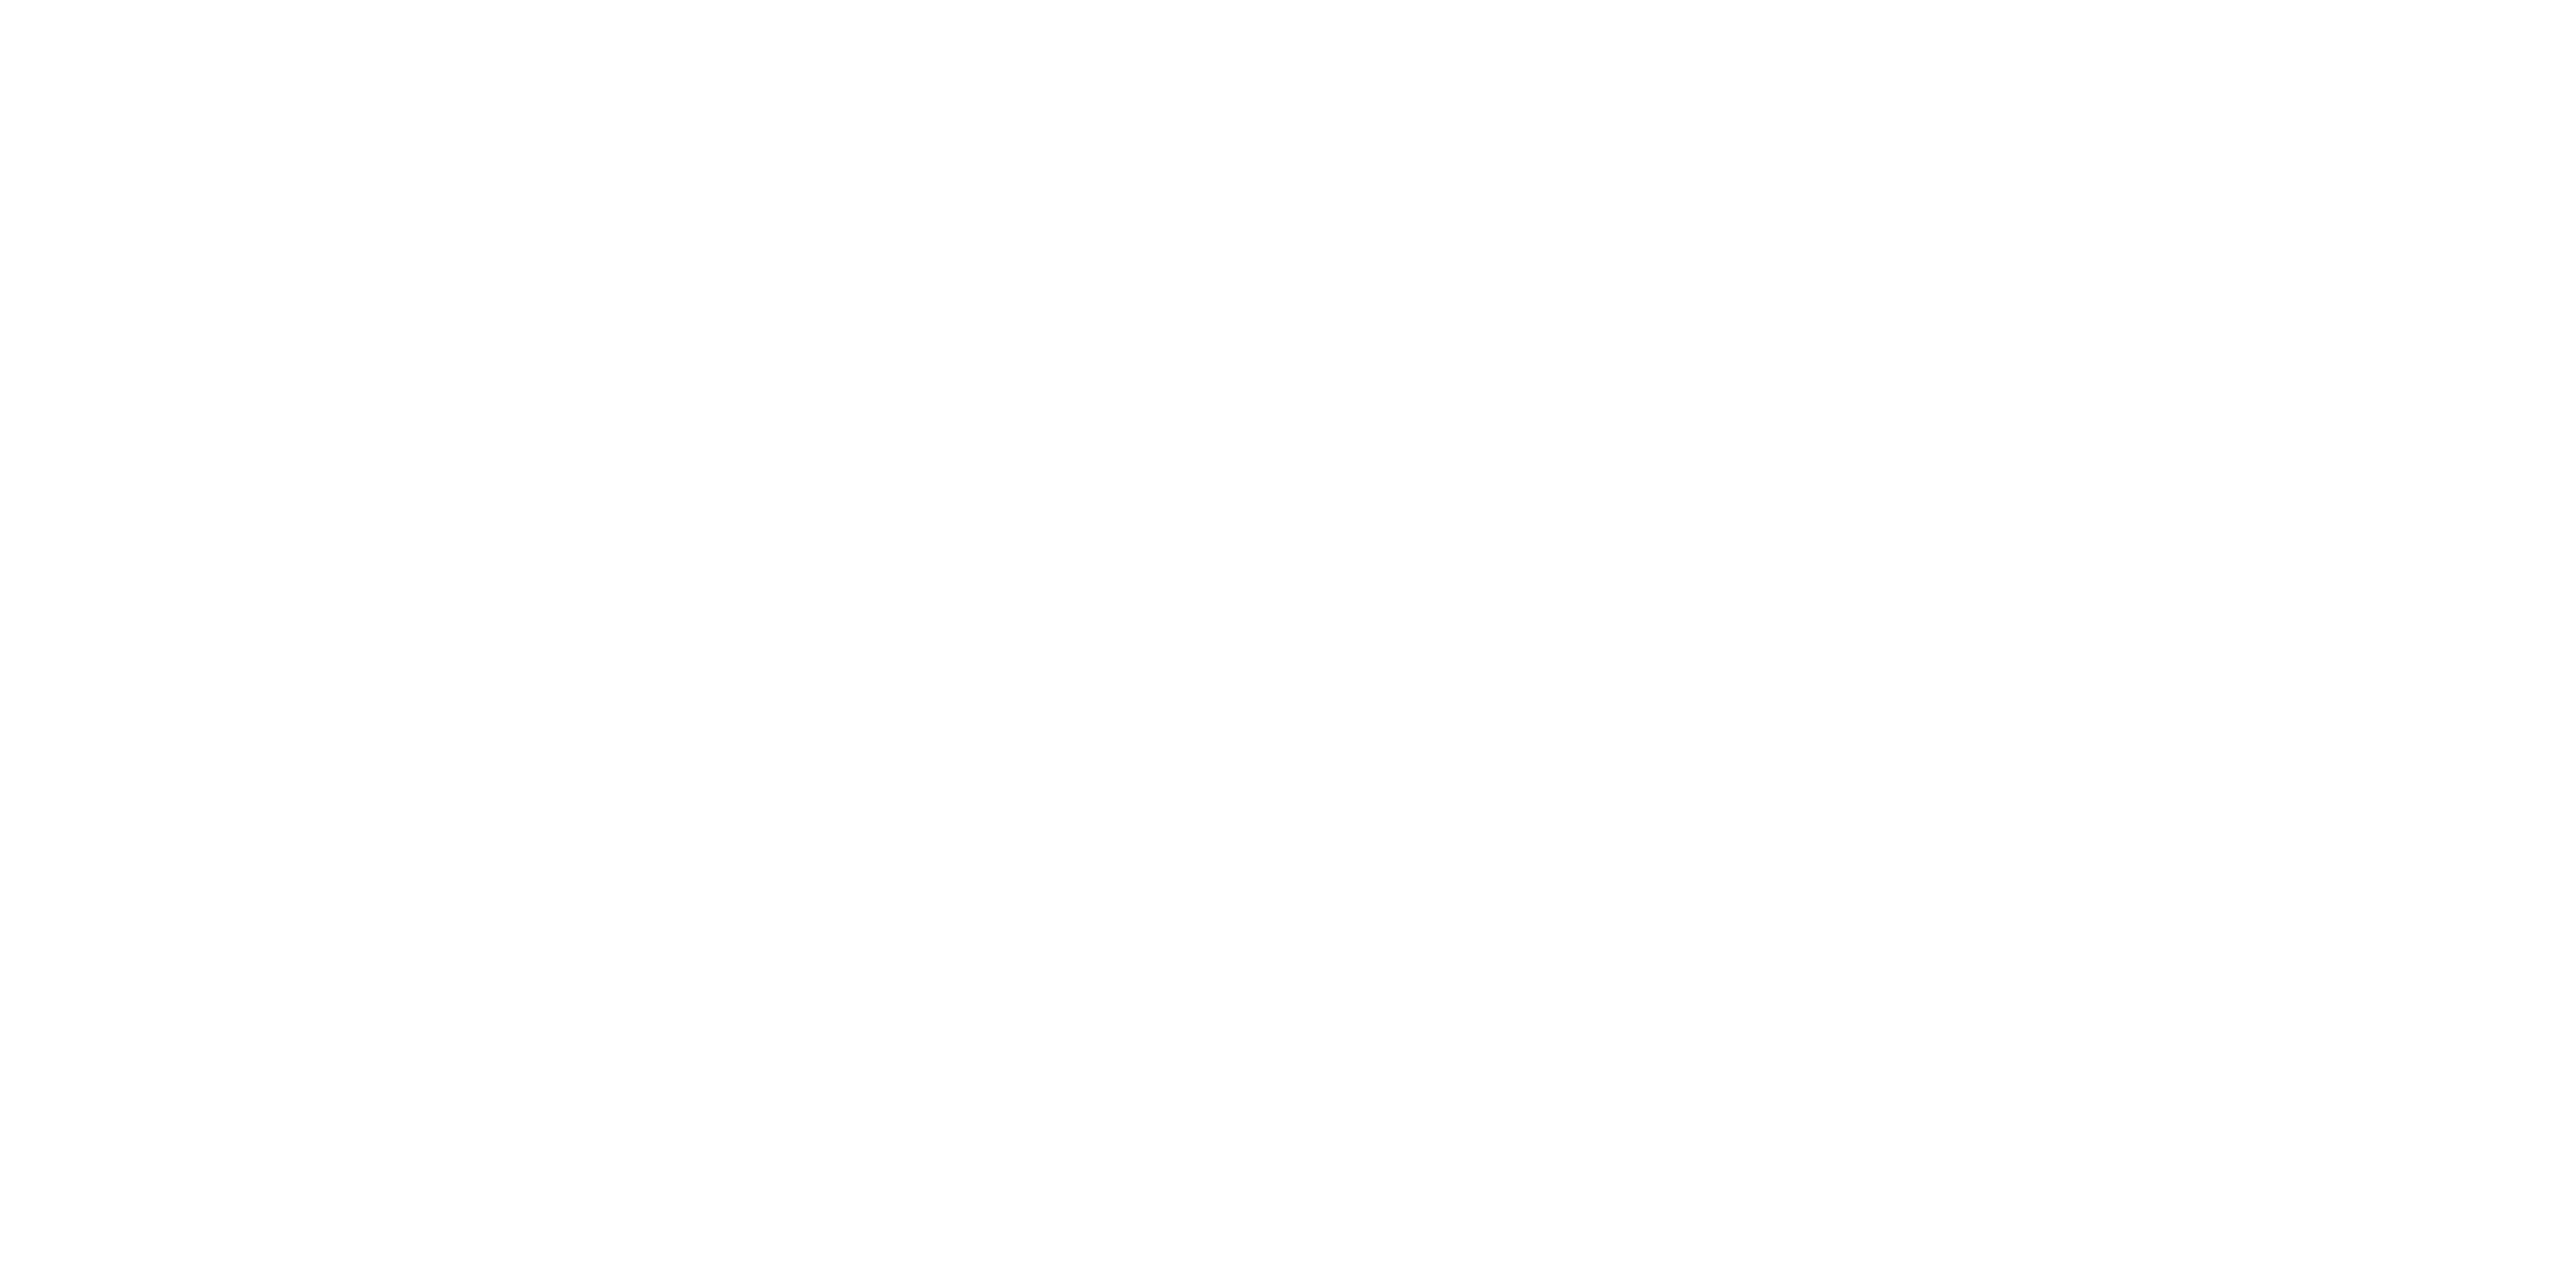

In [32]:
plt.show(testmat)

In [43]:
testimg = Image.open('test.png')
mat = np.array('test.png')
imtest = imreader('test.png')/255

/tmp/ipykernel_952828/1582332372.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  imtest = imreader('test.png')/255


In [9]:
matlist = ()
boollist = []

In [10]:
for a in imglist:
    matimg = ((cv2.imread(a)/255))
    matlist += (matimg,)
    boollist.append(matimg)

In [11]:
boolsum = sum(boollist)
boolsum

array([[[5., 5., 5.],
        [5., 5., 5.],
        [5., 5., 5.],
        ...,
        [5., 5., 5.],
        [5., 5., 5.],
        [5., 5., 5.]],

       [[5., 5., 5.],
        [5., 5., 5.],
        [5., 5., 5.],
        ...,
        [5., 5., 5.],
        [5., 5., 5.],
        [5., 5., 5.]],

       [[5., 5., 5.],
        [5., 5., 5.],
        [5., 5., 5.],
        ...,
        [5., 5., 5.],
        [5., 5., 5.],
        [5., 5., 5.]],

       ...,

       [[5., 5., 5.],
        [5., 5., 5.],
        [5., 5., 5.],
        ...,
        [5., 5., 5.],
        [5., 5., 5.],
        [5., 5., 5.]],

       [[5., 5., 5.],
        [5., 5., 5.],
        [5., 5., 5.],
        ...,
        [5., 5., 5.],
        [5., 5., 5.],
        [5., 5., 5.]],

       [[5., 5., 5.],
        [5., 5., 5.],
        [5., 5., 5.],
        ...,
        [5., 5., 5.],
        [5., 5., 5.],
        [5., 5., 5.]]])

In [12]:
boolmat = (boolsum[:,:,1] != 5).astype(int)

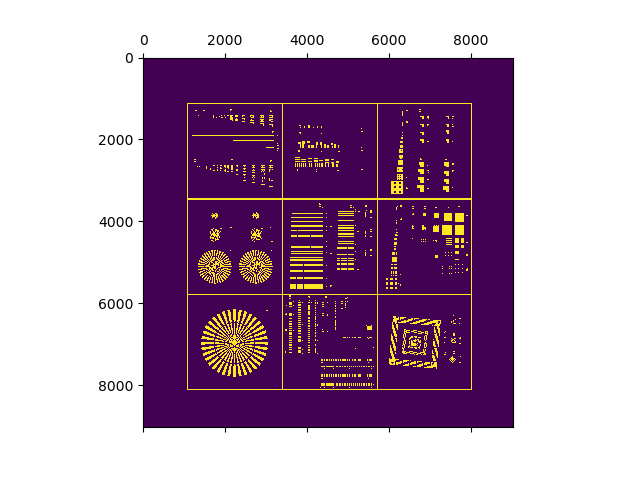

In [48]:
fig = plt.figure()
ax = fig.add_subplot()
ax.matshow(boolmat.transpose(),origin = 'upper')
#selector = RectangleSelector(ax,clicker,useblit = True,button = [1,3],spancoords = 'pixels',interactive = True)
#fig.canvas.mpl_connect('key_press_event',toggler)
plt.show()

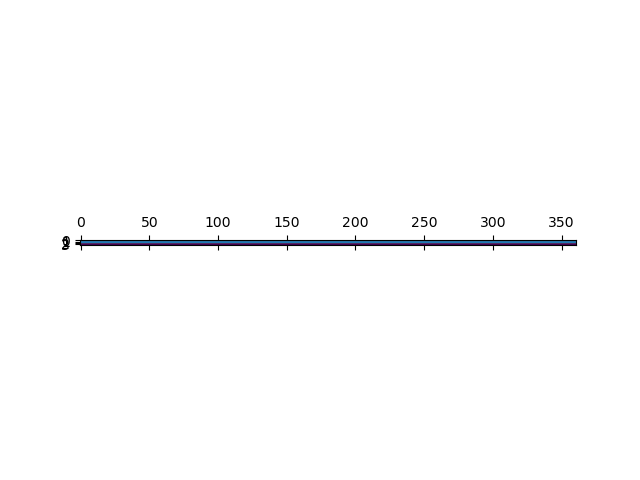

In [74]:
plt.plot(matlist[0][2])
plt.show()

In [13]:
sampmat = boolmat[(int((xstart))):(int((xend))),(int((ystart))):(int((yend)))]

In [14]:
samplist = ()
for a in matlist:
    print(a.shape)
    sampsub = a[(int((xstart))):(int((xend))),(int((ystart))):(int((yend)))]
    sub = sampsub[:,:,0]
    print(sub.shape)
    samplist += (sub,)

(9030, 9030, 3)
(400, 500)
(9030, 9030, 3)
(400, 500)
(9030, 9030, 3)
(400, 500)
(9030, 9030, 3)
(400, 500)
(9030, 9030, 3)
(400, 500)


In [15]:
sample = np.broadcast_to(sampmat,(5,sampmat.shape[0],sampmat.shape[1]))

In [16]:
#testmat2
sample.shape
#boolmat.shape

(5, 400, 500)

In [17]:
samplist[1].shape

(400, 500)

In [18]:
stacklist = ()
for b in samplist:
    print(b.shape)
    sub = np.broadcast_to(b,(5,b.shape[0],b.shape[1]))
    stacklist += (sub,)

(400, 500)
(400, 500)
(400, 500)
(400, 500)
(400, 500)


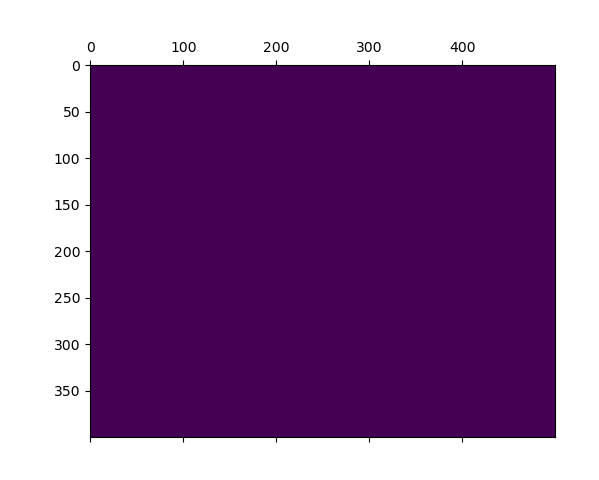

In [34]:
plt.matshow(1-samplist[0])
plt.show()

In [20]:
sample = np.concatenate(stacklist, axis = 0)

In [21]:
np.where(sampmat == 1)

(array([  8,   8,   8, ..., 399, 399, 399]),
 array([469, 470, 471, ..., 494, 495, 499]))

# Refra-index / critical angle calculation

In [2]:
# Pure element 
photonE = 5   # [keV]
element_Z = 14   # 13 - Al, 14 - Si, 24 - Cr, 29 - Cu, 74 - W, 79 - Au

if True:   # get constants 
    # Index of Refraction = (1-delta) - i(beta)
    delta = 1 - xb.Refractive_Index_Re(xb.AtomicNumberToSymbol(element_Z), photonE, xb.ElementDensity(element_Z))
    beta  = xb.Refractive_Index_Im(xb.AtomicNumberToSymbol(element_Z), photonE, xb.ElementDensity(element_Z))
    print('Photon energy:    %.3f keV ' %photonE )
    print('Wave length:      %.3f nm ' %(1.2398 / photonE) )
    print('--------------------')
    print('Element/material: %s ' %xb.AtomicNumberToSymbol(element_Z) )
    print('Density:          %.3f g/cm3 ' %xb.ElementDensity(element_Z))
    print('--------------------')
    print('Refra_index: delta = %g' %delta )
    print('             beta  = %g' %beta )
    print('Critical angle:   %.6f rad ' %np.sqrt(2*delta))
    print('                  %.6f deg ' %(np.sqrt(2*delta)*180/3.14) )
    if True:   # clean variables
        del photonE, element_Z
        del delta, beta

Photon energy:    5.000 keV 
Wave length:      0.248 nm 
--------------------
Element/material: Si 
Density:          2.330 g/cm3 
--------------------
Refra_index: delta = 1.98104e-05
             beta  = 1.12679e-06
Critical angle:   0.006294 rad 
                  0.360831 deg 


In [11]:
# Compound 
photonE = 5   # [keV]
compound = 'C5O2H8'

if True:   # get constants 
    # Index of Refraction = (1-delta) - i(beta)
    density = xb.GetCompoundDataNISTByIndex(xb.NIST_COMPOUND_POLYMETHYL_METHACRALATE_LUCITE_PERSPEX)['density']
    delta = 1 - xb.Refractive_Index_Re(compound, photonE, density)
    beta  = xb.Refractive_Index_Im(compound, photonE, density)
    print('Photon energy:    %.3f keV ' %photonE )
    print('Wave length:      %.3f nm ' %(1.2398 / photonE) )
    print('--------------------')
    print('Element/material: %s ' %compound )
    print('Density:          %.3f g/cm3 ' %density )
    print('--------------------')
    print('Refra_index: delta = %g' %delta )
    print('             beta  = %g' %beta )
    print('Critical angle:   %.6f rad ' %np.sqrt(2*delta))
    print('                  %.6f deg ' %(np.sqrt(2*delta)*180/3.14) )
    if True:   # clean variables 
        del photonE, compound
        del density, delta, beta

Photon energy:    5.000 keV 
Wave length:      0.248 nm 
--------------------
Element/material: C5O2H8 
Density:          1.190 g/cm3 
--------------------
Refra_index: delta = 1.0745e-05
             beta  = 6.29492e-08
Critical angle:   0.004636 rad 
                  0.265743 deg 


In [15]:
xb.CompoundParser('C5O2H8')

{'nElements': 3,
 'nAtomsAll': 15.0,
 'Elements': (1, 6, 8),
 'massFractions': (0.08069509637471288,
  0.5997203635274143,
  0.3195845400978728),
 'nAtoms': (8.0, 5.0, 2.0),
 'molarMass': 100.13}

In [30]:
xb.GetCompoundDataNISTByIndex(xb.NIST_COMPOUND_POLYMETHYL_METHACRALATE_LUCITE_PERSPEX)

{'name': 'Polymethyl Methacralate (Lucite, Perspex)',
 'nElements': 3,
 'density': 1.19,
 'Elements': (1, 6, 8),
 'massFractions': (0.080538, 0.599848, 0.319614)}

# GISAX on Si substrate

In [ ]:
##Input Parameters
print('Wave Propagation Size:')
wave_prop_size = input()
print('Wave Grid Step:')
wave_grid_step = list(float(i) for i in ((input().split(','))))
print(wave_grid_step)

In [97]:
wave_prop_step = widgets.FloatText(value = 0, description = 'Wave Propogation Step', disabled = False)
wave_prop_dist = widgets.FloatText(value = 0, description = 'Wave Propagation Distance', disabled = False)

Box(children = [wave_prop_step,wave_prop_dist])

Box(children=(FloatText(value=0.0, description='Wave Propogation Step'), FloatText(value=0.0, description='Wav…

In [98]:
wave_prop_step = wave_prop_step.value

In [96]:
wave_prop_size = [int(xend)-int(xstart),int(yend)-int(ystart)]   # [x pix, y pix]
wave_grid_step = [25.0, 50.0]   # [nm], [X, Y]
wave_prop_step = 100   # [nm]
wave_prop_dist = 200 * 1e3   # [nm]
dist_to_focal = -100 * 1e3   # [nm]

photonE = 5.0   # 1.772e-3   # [keV]
gau_width_param = [18.25e3, 18.25e3]   # [nm]
gau_cen_offset = [0, 0.0e3]   # [nm]
beam_flux = 1.0e13   # [ph/s]
incident_ang = 0.0 # [deg]
rot_ax = [1, 0]

temp = wave_grid_step[1] * np.sin(np.deg2rad(incident_ang)) / (1.2398 / photonE) * 2
if np.remainder(temp, 2) >=1: 
    print(' Potential sampling issue !!!')

In [97]:
CalLat_beamspec_estimate(z=5e6, fwhm=1e6, wave_len=700)

fwhm_0 = 1000.000 [um]   # fwhm at waist
z_bar  = 1.122 [m]   # Rayleigh range
fwhm_z = 1.000 [mm]   # fwhm at z
R_o_C  = 251.781 [m]   # radius of curvature


## Create incident wave

In [98]:
def gaussplots(*args):
    # Gaussian wave at focal plane 
    flag_plot = True

    x_ax = (np.arange(wave_prop_size[0]) - int(wave_prop_size[0]/2)) * wave_grid_step[0]
    y_ax = (np.arange(wave_prop_size[1]) - int(wave_prop_size[1]/2)) * wave_grid_step[1] 
    # amplitude
    wf_fc_amp = Gaussian_2D(x_ax,y_ax,1,0, gau_cen_offset[0], gau_width_param[0]/2.355, gau_cen_offset[1],gau_width_param[1]/2.355)
    # phase
    wf_fc_ph = np.zeros(wave_prop_size)
    wf_fc = wf_fc_amp * np.exp(-1j * wf_fc_ph)
    # wavefront at focal plane
    print(np.shape(wf_fc))
    wf_fc *= np.sqrt(beam_flux / np.sum( np.abs(wf_fc * np.conjugate(wf_fc))))
    print('%g' %np.sum( np.abs(wf_fc * np.conjugate(wf_fc)) ) )
    if flag_plot:   # 1D plot of wavefront 
        temp = wf_fc
        lim_region = False
        plot_region = [-10, 10]

        a = plt.figure(figsize=(10,3.5))
        plt.subplot(121)
        plt.plot(x_ax/1e3, np.abs(temp)[:, int(np.shape(temp)[1]/2 + gau_cen_offset[1]/wave_grid_step[1])], label='x amp')
        plt.plot(y_ax/1e3, np.abs(temp)[int(np.shape(temp)[0]/2 + gau_cen_offset[0]/wave_grid_step[0]), :], label='y amp')
        plt.legend(); plt.xlabel('x/y_ax [um]')
        if lim_region: 
            plt.xlim(plot_region)
        plt.subplot(122)
        plt.plot(x_ax/1e3, np.angle(temp)[:, int(np.shape(temp)[1]/2 + gau_cen_offset[1]/wave_grid_step[1])], label='x ph')
        plt.plot(y_ax/1e3, np.angle(temp)[int(np.shape(temp)[0]/2 + gau_cen_offset[0]/wave_grid_step[0]), :], label='y ph')
        plt.legend(); plt.xlabel('x/y_ax [um]')
        if lim_region: 
            plt.xlim(plot_region)
        plt.tight_layout()
        del temp, plot_region, lim_region
    if flag_plot:   # 2D plot of wavefront 
        temp = wf_fc
        lim_region = False
        plot_region = [-10, 10, -10, 10]

        b = plt.figure(figsize=(10,4.5))
        plt.subplot(121)
        plt.imshow(np.abs(temp).transpose(), origin='lower', 
                   extent=[x_ax.min()/1e3, x_ax.max()/1e3, 
                           y_ax.min()/1e3, y_ax.max()/1e3])
        if lim_region: 
            plt.axis(plot_region)
        plt.title('Amplitude'); plt.colorbar()
        plt.xlabel('X Position [um]'); plt.ylabel('Y Position [um]')
        plt.subplot(122)
        plt.imshow(np.angle(temp).transpose(), origin='lower', 
                   extent=[x_ax.min()/1e3, x_ax.max()/1e3, 
                           y_ax.min()/1e3, y_ax.max()/1e3])
        if lim_region: 
            plt.axis(plot_region)
        plt.title('Phase'); plt.colorbar()
        plt.xlabel('X Position [um]'); plt.ylabel('Y Position [um]')
        plt.tight_layout()
        del temp, plot_region, lim_region
    del wf_fc_amp, wf_fc_ph, x_ax, y_ax, flag_plot
    return wf_fc,a,b

(29, 45)
1e+13


/tmp/ipykernel_270566/2411331528.py:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  a = plt.figure(figsize=(10,3.5))


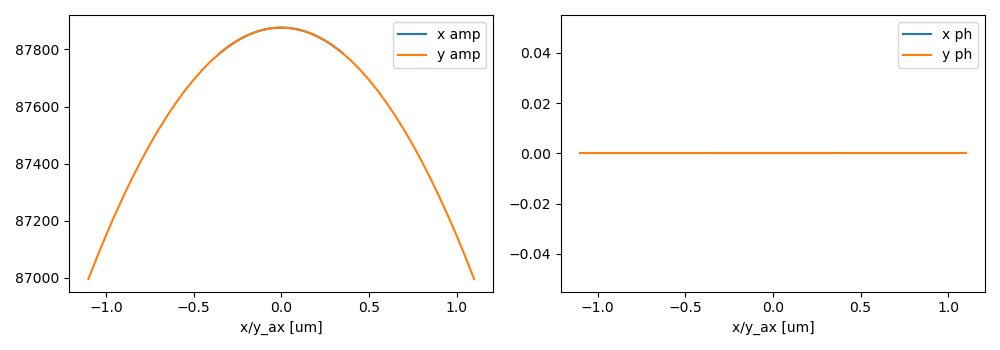

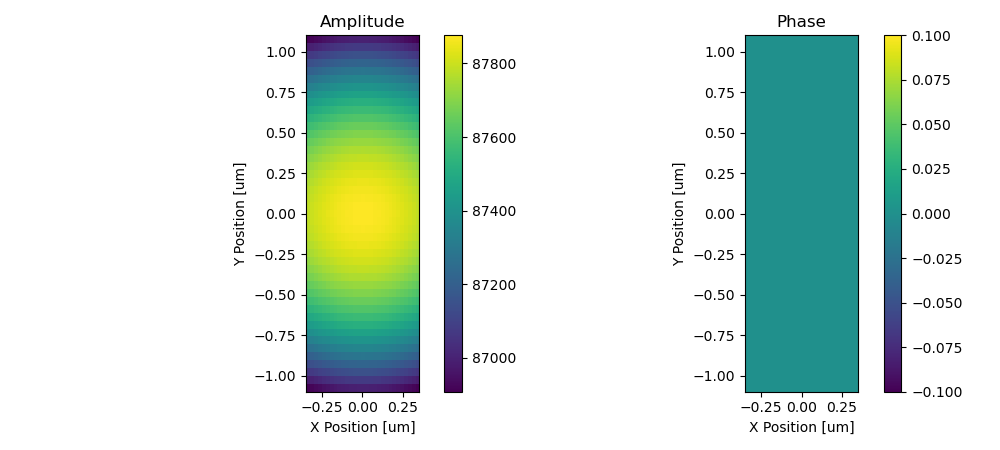

In [99]:
wf_fc,a,b = gaussplots()

(29, 45)
1e+13


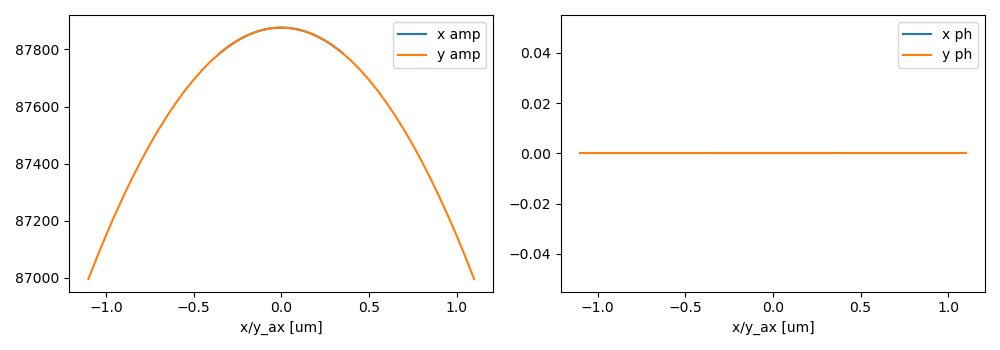

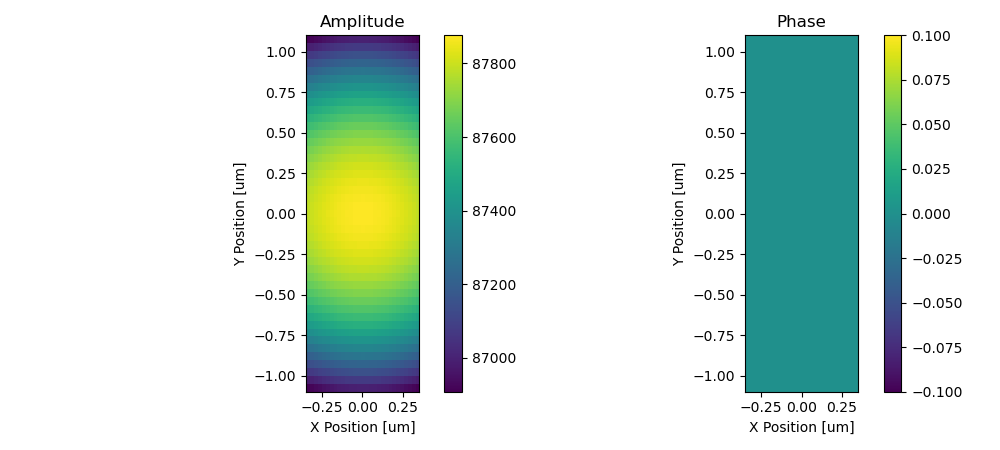

In [100]:
# Modify wavefront 
flag_plot = True

x_ax = (np.arange(wave_prop_size[0]) - int(wave_prop_size[0]/2)) * wave_grid_step[0]
y_ax = (np.arange(wave_prop_size[1]) - int(wave_prop_size[1]/2)) * wave_grid_step[1]
# amplitude
wf_fc_amp = np.abs(wf_fc)
# phase
wf_fc_ph_ramp = np.zeros(wave_prop_size)
if  rot_ax[0] != 0:   # rot around axis=0 
    for ii in range(np.dot(rot_ax, np.shape(wf_fc_ph_ramp))): 
#Look at the DOI paper for reference
        wf_fc_ph_ramp[ii,:] = (y_ax) * np.sin(np.deg2rad(incident_ang)) / (1.2398 / photonE) * 2 * np.pi
wf_fc_mod = wf_fc_amp * np.exp(-1j * (wf_fc_ph_ramp + np.angle(wf_fc)) )
print(np.shape(wf_fc))
wf_fc_mod *= np.sqrt(beam_flux / np.sum( np.abs(wf_fc * np.conjugate(wf_fc))))
print('%g' %np.sum( np.abs(wf_fc * np.conjugate(wf_fc)) ) )
if flag_plot:   # 1D plot incident wavefront 
    temp = wf_fc_mod
    plt.figure(figsize=(10,3.5))
    plt.subplot(121)
    plt.plot(x_ax/1e3, np.abs(temp)[:, int(np.shape(temp)[1]/2 + gau_cen_offset[1]/wave_grid_step[1])], label='x amp')
    plt.plot(y_ax/1e3, np.abs(temp)[int(np.shape(temp)[0]/2 + gau_cen_offset[0]/wave_grid_step[0]), :], label='y amp')
    plt.legend(); plt.xlabel('x/y_ax [um]')
    plt.subplot(122)
    plt.plot(x_ax/1e3, np.angle(temp)[:, int(np.shape(temp)[1]/2 + gau_cen_offset[1]/wave_grid_step[1])], label='x ph')
    plt.plot(y_ax/1e3, np.angle(temp)[int(np.shape(temp)[0]/2 + gau_cen_offset[0]/wave_grid_step[0]), :], label='y ph')
    plt.legend(); plt.xlabel('x/y_ax [um]')
    plt.tight_layout()
    del temp
if flag_plot:   # 2D plot incident wavefront 
    temp = wf_fc_mod
    lim_region = False
    plot_region = [-.1, .1, -2.1, -1.9]
    
    plt.figure(figsize=(10,4.5))
    plt.subplot(121)
    plt.imshow(np.abs(temp).transpose(), origin='lower', 
               extent=[x_ax.min()/1e3, x_ax.max()/1e3, 
                       y_ax.min()/1e3, y_ax.max()/1e3])
    if lim_region: 
        plt.axis(plot_region)
    plt.title('Amplitude'); plt.colorbar()
    plt.xlabel('X Position [um]'); plt.ylabel('Y Position [um]')
    plt.subplot(122)
    plt.imshow(np.angle(temp).transpose(), origin='lower', 
               extent=[x_ax.min()/1e3, x_ax.max()/1e3, 
                       y_ax.min()/1e3, y_ax.max()/1e3])
    if lim_region: 
        plt.axis(plot_region)
    plt.title('Phase'); plt.colorbar()
    plt.xlabel('X Position [um]'); plt.ylabel('Y Position [um]')
    plt.tight_layout()
    del temp, plot_region, lim_region
del wf_fc_amp, wf_fc_ph_ramp, x_ax, y_ax, flag_plot

1
Back propagating 1 / 1


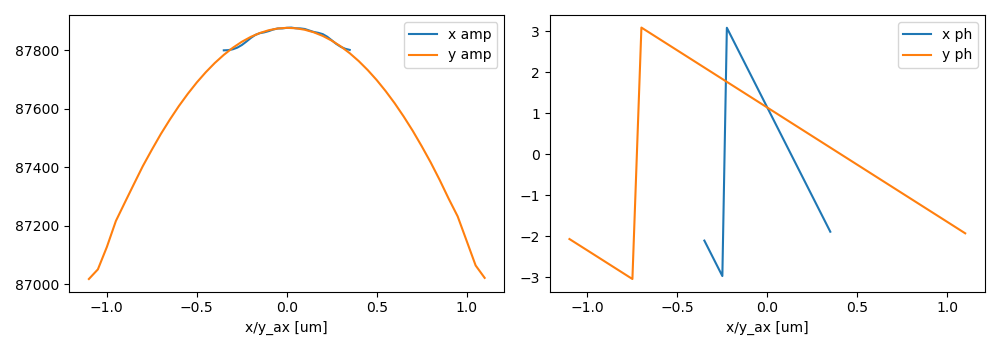

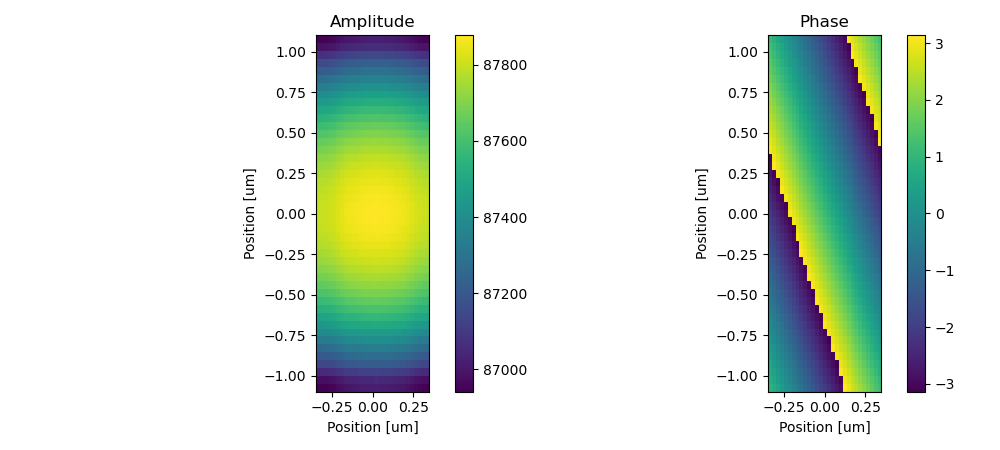

In [101]:
# Back propagation 
flag_plot = True

back_prop_size = wave_prop_size
back_prop_dist = dist_to_focal
back_prop_step = back_prop_dist   # [nm] 
back_prop_grid = wave_grid_step   # [nm]

x_ax = (np.arange(back_prop_size[0]) - int(back_prop_size[0]/2)) * back_prop_grid[0]
y_ax = (np.arange(back_prop_size[1]) - int(back_prop_size[1]/2)) * back_prop_grid[1]

N = int(np.abs(back_prop_dist / back_prop_step))
print(N)
if N != 1: 
    wf_record = np.zeros((N, wave_prop_size[0], wave_prop_size[1])) * (1 + 1j)
wf_temp = wf_fc_mod.copy()
for ii in range(N): 
    print('Back propagating %d / %d' %(ii+1, N), end='\r')
    wf_temp = wavefront_propagator_angspc(wf_temp, dist_z=back_prop_step, grid_size=back_prop_grid, 
                                          wave_len=1.2398 / photonE, pad_size=back_prop_size, flag_cropout=False)
    if N != 1: 
        wf_record[ii] = wf_temp
print('Back propagating %d / %d' %(ii+1, N), end='\n' )
wf_bp = wf_temp
if flag_plot:   # 1D plot of wavefront 
    temp = wf_bp
    lim_region = False
    plot_region = [-10, 10]
    
    plt.figure(figsize=(10,3.5))
    plt.subplot(121)
    plt.plot(x_ax/1e3, np.abs(temp)[:, int(np.shape(temp)[1]/2 + gau_cen_offset[1]/wave_grid_step[1])], label='x amp')
    plt.plot(y_ax/1e3, np.abs(temp)[int(np.shape(temp)[0]/2 + gau_cen_offset[0]/wave_grid_step[0]), :], label='y amp')
    plt.legend(); plt.xlabel('x/y_ax [um]')
    if lim_region: 
        plt.xlim(plot_region)
    plt.subplot(122)
    plt.plot(x_ax/1e3, np.angle(temp)[:, int(np.shape(temp)[1]/2 + gau_cen_offset[1]/wave_grid_step[1])], label='x ph')
    plt.plot(y_ax/1e3, np.angle(temp)[int(np.shape(temp)[0]/2 + gau_cen_offset[0]/wave_grid_step[0]), :], label='y ph')
    plt.legend(); plt.xlabel('x/y_ax [um]')
    if lim_region: 
        plt.xlim(plot_region)
    plt.tight_layout()
    del temp, plot_region, lim_region
if flag_plot:   # 2D plot of wavefront 
    temp = wf_bp
    lim_region = False
    plot_region = [-10, 10, -10, 10]
    
    plt.figure(figsize=(10,4.5))
    plt.subplot(121)
    plt.imshow(np.abs(temp).transpose(), origin='lower', 
               extent=[x_ax.min()/1e3, x_ax.max()/1e3, 
                       y_ax.min()/1e3, y_ax.max()/1e3])
    if lim_region: 
        plt.axis(plot_region)
    plt.title('Amplitude'); plt.colorbar()
    plt.xlabel('Position [um]'); plt.ylabel('Position [um]')
    plt.subplot(122)
    plt.imshow(np.angle(temp).transpose(), origin='lower', 
               extent=[x_ax.min()/1e3, x_ax.max()/1e3, 
                       y_ax.min()/1e3, y_ax.max()/1e3])
    if lim_region: 
        plt.axis(plot_region)
    plt.title('Phase'); plt.colorbar()
    plt.xlabel('Position [um]'); plt.ylabel('Position [um]')
    plt.tight_layout()
    del temp, plot_region, lim_region
del wf_temp, x_ax, y_ax, flag_plot
if N != 1: 
    plot_region = [-60, 0, -30, 30]
    if True:   # 2D plot of wavefront 
        temp = np.abs(wf_record)
        lim_region = True

        plt.figure(figsize=(10,4.5))
        plt.subplot(121)
        plt.imshow(np.log10(temp[:, :, int(np.shape(temp)[2]/2 + gau_cen_offset[1]/wave_grid_step[1])]).transpose(), origin='lower', 
                   extent=[ 0, back_prop_dist/1e4, 
                           -np.shape(temp)[1]/2 * wave_grid_step[0] / 1e3, 
                            np.shape(temp)[1]/2 * wave_grid_step[0] / 1e3])
        if lim_region: 
            plt.axis(plot_region)
        plt.colorbar(); plt.title('XZ slice at Y = %0.3f [um]' %(gau_cen_offset[1]/1e3))
        plt.ylabel('X [um]'); plt.xlabel('Z [x10 um]')
        plt.tight_layout()
        plt.subplot(122)
        plt.imshow(np.log10(temp[:, int(np.shape(temp)[1]/2 + gau_cen_offset[0]/wave_grid_step[0]), :]).transpose(), origin='lower', 
                   extent=[ 0, back_prop_dist/1e4, 
                           -np.shape(temp)[2]/2 * wave_grid_step[1] / 1e3, 
                            np.shape(temp)[2]/2 * wave_grid_step[1] / 1e3])
        if lim_region: 
            plt.axis(plot_region)
        plt.colorbar(); plt.title('YZ slice at X = %0.3f [um]' %(gau_cen_offset[0]/1e3))
        plt.ylabel('Y [um]'); plt.xlabel('Z [x10 um]')
        plt.tight_layout()
        del temp, lim_region
    del plot_region, wf_record

### Free propagation for sanity check

In [811]:
wf_in = wf_bp.copy()

In [812]:
# Simulation parameters 
print('wave_prop_size: ', wave_prop_size)
print('wave_prop_dist: %f [nm]' %wave_prop_dist)
print('wave_prop_step: %f [nm]' %wave_prop_step)
print('dist_to_focal: %f [nm]' %dist_to_focal)
print('wave_grid_step: [%f, %f] [nm]' %(tuple(wave_grid_step)))
farf_prop_size = [5001, 5001]
wave_len = 1.2398 / photonE   # [nm]

flag_mask_beam = False   # whether mask out the direct beam 
# Keep flag_mask_beam = False, otherwise normalization is not correct
flag_bin_result = False   # whether bin the diffraction pattern at farfield 
bin_size = [5, 5]   # size of binning 
flag_crop_result = False   # whether crop the diffraction pattern at farfield 
result_size = [2001,2001]   # size of cropped result 

wave_prop_size:  [1000, 1000]
wave_prop_dist: 200000.000000 [nm]
wave_prop_step: 100.000000 [nm]
dist_to_focal: -100000.000000 [nm]
wave_grid_step: [25.000000, 25.000000] [nm]


In [813]:
# Propagate in free space 
P = int(np.abs(wave_prop_dist) / wave_prop_step)
print('Started ' + strftime('%H:%M:%S', localtime()) )
if not np.array_equal(np.shape(wf_in), wave_prop_size):  
    wf_temp = Array_zeropad_2D(wf_in, AddTo=wave_prop_size)
else: 
    wf_temp = np.copy(wf_in)
wf_rec = np.zeros((P+1, wave_prop_size[0], wave_prop_size[1])).astype('complex128')
wf_rec[0] = wf_temp
for ii in range(P): 
    print('ii = %d / %d' %(ii+1, P), end='\r')
    wf_temp = wavefront_propagator_angspc(wf_temp, dist_z=wave_prop_step, grid_size=wave_grid_step, 
                                          wave_len=wave_len, pad_size=wave_prop_size, flag_cropout=False)
    wf_rec[ii+1] = wf_temp
print('Finished ' + strftime('%H:%M:%S', localtime()) )
print(np.shape(wf_rec))
if True: 
    Save_tif(np.abs(wf_rec), 'wf_rec_freeprop_amp.tif', OverWrite=True)
    Save_tif(np.angle(wf_rec),  'wf_rec_freeprop_ph.tif',  OverWrite=True)
del wf_temp, wf_rec, P

Started 14:16:51
Finished 14:22:40
(2001, 1000, 1000)
>>>>>> Error! File already exists. 
>>>>>> Existing file is overwritten! 
>>>>>> Error! File already exists. 
>>>>>> Existing file is overwritten! 


In [814]:
wf_rec_amp = Read_tif('wf_rec_freeprop_amp.tif')
wf_rec_ph = Read_tif('wf_rec_freeprop_ph.tif')

In [815]:
print(np.shape(wf_rec_amp))
print(np.shape(wf_rec_ph))

(2001, 1000, 1000)
(2001, 1000, 1000)


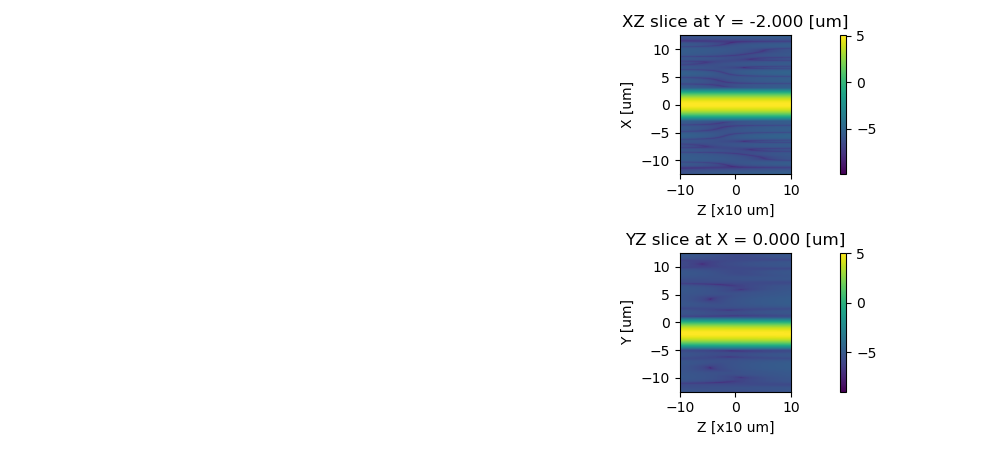

In [816]:
if True:   # 2D plot of wavefront 
    temp = wf_rec_amp
    lim_region = False
    plot_region = [-60, 60, -10, 10]
    
    plt.figure(figsize=(10,4.5))
    plt.subplot(211)
    plt.imshow(np.log10(temp[:, :, int(np.shape(temp)[2]/2 + gau_cen_offset[1]/wave_grid_step[1])]).transpose(), origin='lower', 
               extent=[-wave_prop_dist/2/1e4, wave_prop_dist/2/1e4, 
                       -np.shape(temp)[1]/2 * wave_grid_step[0] / 1e3, 
                        np.shape(temp)[1]/2 * wave_grid_step[0] / 1e3])
    if lim_region: 
        plt.axis(plot_region)
    plt.colorbar(); plt.title('XZ slice at Y = %0.3f [um]' %(gau_cen_offset[1]/1e3))
    plt.ylabel('X [um]'); plt.xlabel('Z [x10 um]')
    plt.tight_layout()
    plt.subplot(212)
    plt.imshow(np.log10(temp[:, int(np.shape(temp)[1]/2 + gau_cen_offset[0]/wave_grid_step[0]), :]).transpose(), origin='lower', 
               extent=[-wave_prop_dist/2/1e4, wave_prop_dist/2/1e4, 
                       -np.shape(temp)[2]/2 * wave_grid_step[1] / 1e3, 
                        np.shape(temp)[2]/2 * wave_grid_step[1] / 1e3])
    if lim_region: 
        plt.axis(plot_region)
    plt.colorbar(); plt.title('YZ slice at X = %0.3f [um]' %(gau_cen_offset[0]/1e3))
    plt.ylabel('Y [um]'); plt.xlabel('Z [x10 um]')
    plt.tight_layout()
    del temp, plot_region, lim_region

## Create substrate

In [22]:
pixels = 24
division = 0.25
limit = int(pixels*division*0.5)

In [23]:
np.linspace(0,1000,1001)
limit

3

In [24]:
t = np.arange(0,wave_prop_size[1])
m = np.array([1 if np.isin(math.floor(d)%pixels,range(0,limit)) else 1 if np.isin(math.floor(d)%pixels,range(pixels - limit,pixels)) else 0 for d in t])
gap = np.array([1 if np.isin(math.floor(d)%100,range(1,81)) else 0 for d in t])
#m[670:680] = 550 #defect allowed
#m[570:580] = 520
#u = np.arange(0,500)
#t1 = np.tile(t,500)
#m1 = np.tile(m,500)
#u1 = np.repeat(u,1000)
#substrate = np.array([t1,m1,u1]).T
#substrate
#fig = plt.figure()
#ax = fig.add_subplot(111, projection = '3d')
#test = ax.plot_trisurf(t1,u1,m1)
#plt.show()
#for i in range(len(u)):
#    for j in range(len(m)):
#        substrate.append([t[j],m[j],u[i]])
#substrate.reshape((1000,2,500))

In [25]:
mat3d = np.zeros((wave_prop_size[0],wave_prop_size[1]))
base = np.ones((10,wave_prop_size[0],wave_prop_size[1]))
start = np.zeros((50,wave_prop_size[0],wave_prop_size[1]))
end = np.zeros((50,wave_prop_size[0],wave_prop_size[1]))

In [26]:
for i in range(len(t)):
    if m[i] == 1:
        mat3d[:,t[i]] = 1
#    if gap[i] >0:
#        matb[:,t[i]] = 1
fin = np.broadcast_to(mat3d,(50,wave_prop_size[0],wave_prop_size[1]))

In [13]:
mat3d

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [14]:
mat3d.T

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [25]:
for i in range(len(t)):
    if m[i] > 1:
        for d in range(m[i],500,-1):
            mat3d[t[i],d] = 1
#    if gap[i] >0:
#        for d in range(gap[i],500,1):
#            matb[d,t[i]] = 1

In [102]:
mat3d

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [27]:
#test = mat3d
#testb = matb
#testsub = matsub
#sub = np.tile(testb,(10,1,1))
#substrate = np.tile(test,(345,1,1))
stacks = ()
#for i in range(100):
#    stacks = stacks + (testb,)
#for i in range(50):
#    stacks = stacks + (test,)
#for i in range(10):
##    stacks = stacks + (testsub,)
#for i in range(325):
#    stacks = stacks + (testb,)
substratea = np.concatenate((start,fin,base,end),axis = 0)
sample = np.concatenate((fin,base),axis = 0)

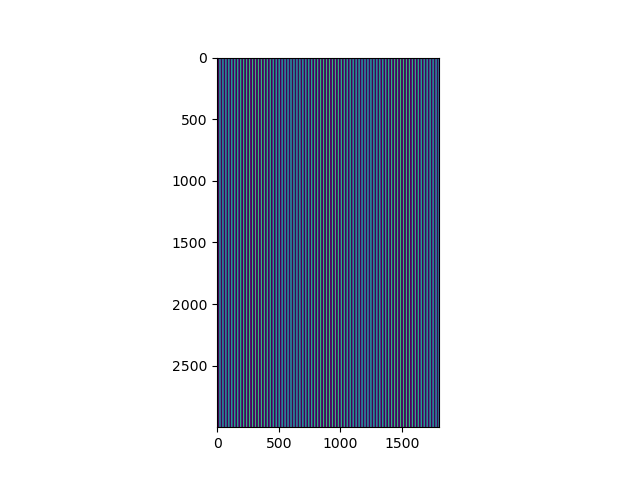

In [28]:
plt.figure()
plt.imshow(mat3d)
plt.show()

In [66]:
substrate = np.transpose(substratea,(1,2,0))

In [67]:
np.shape(substrate)

(3000, 1800, 160)

In [31]:
#select_x = sample[1,2]
#select_y = sample[1,2]
samplet = np.transpose(sample,(1,2,0))

In [32]:
np.shape(samplet)

(3000, 1800, 60)

In [130]:

select = samplet[int(np.round(xstart,0)):int(np.round(xend,0)),int(np.round(ystart,0)):int(np.round(yend,0)),:]

CPU times: user 175 ms, sys: 25.2 ms, total: 200 ms
Wall time: 199 ms


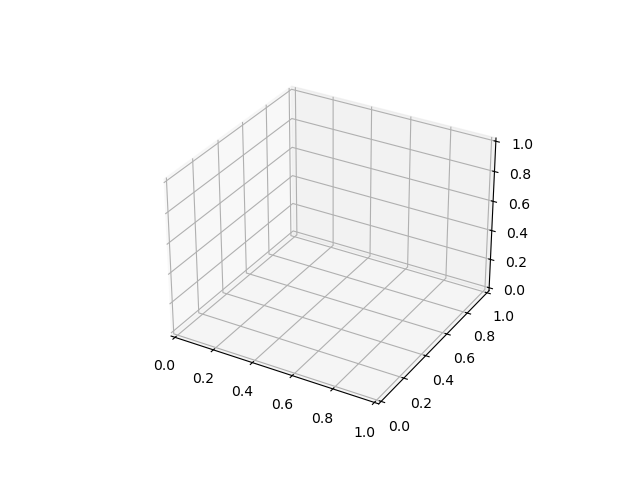

In [37]:
%%time
ax = plt.figure().add_subplot(projection = '3d')

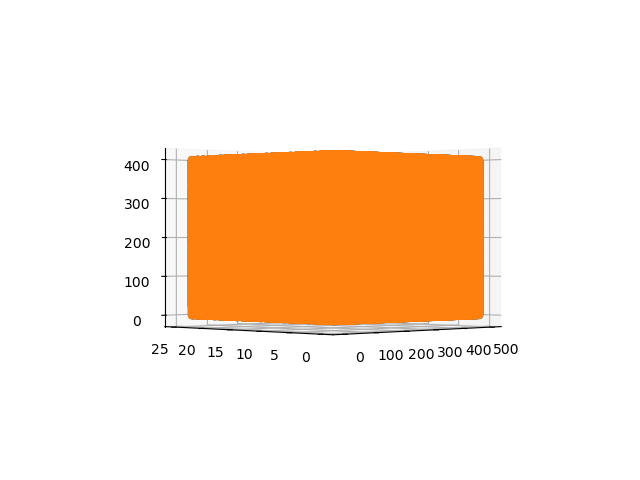

CPU times: user 6min 19s, sys: 26.1 s, total: 6min 45s
Wall time: 6min 24s


In [29]:
%%time
ax.voxels(inv)
ax.view_init(elev = 0, azim = 225, vertical_axis = 'y')
plt.show()

In [35]:
a,b,c = inv.nonzero()
a
b
c

array([469, 470, 471, ..., 494, 495, 499])

In [ ]:
inv = 1-sample

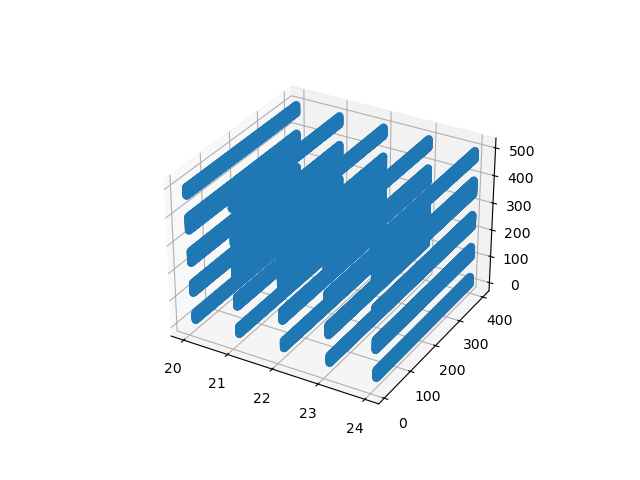

In [38]:
ax.scatter(a,b,c)
plt.show()

## Create surface structure

In [82]:
# Sample modification 
file_name = 'square_dot'
if False: # Read sample from bmp 
    im = pim.open(file_name + '.bmp')
    image = np.asarray(im)
    if True: 
        plt.figure()
        plt.imshow(image); plt.colorbar()
    if True: 
        Save_tif(image!=255, file_name + '.tif', OverWrite=False)
if False: # Read sample from tif 
    image = Read_tif(file_name + '.tif')
    print(np.shape(image))

    image_pad = Array_size_adjust(image, adj_to=[np.shape(substrate)[0], 
                                                 np.shape(substrate)[1]])
    print(np.shape(image_pad))
    if False: # Plot image 
        plt.figure()
        plt.imshow(image_pad); 
        plt.colorbar(); plt.tight_layout()
if False: # Gaussian function for edge softening 
    gau_size = [31, 31]
    gau_width = [1.0, 1.0]
    x_ax = (np.arange(gau_size[0]) - int(gau_size[0]/2))
    y_ax = (np.arange(gau_size[1]) - int(gau_size[1]/2))
    gau_fun = Gaussian_2D(x_ax, y_ax, 1, 0, 0, gau_width[0], 0, gau_width[1])
    gau_fun = gau_fun / np.sum(gau_fun.reshape(-1))
    if False: 
        plt.figure(figsize=(4.5, 4.5))
        plt.imshow(gau_fun)
        plt.colorbar(); plt.tight_layout()
if False: # soften the edges 
    if True: 
        print('Started ' + strftime('%H:%M:%S', localtime()) )
        image_soft = np.zeros_like(image_pad)
        image_soft = sp.signal.convolve2d(image_pad, gau_fun, mode='same', boundary='fill', fillvalue=0)
        print('Finished ' + strftime('%H:%M:%S', localtime()) )
        print(np.shape(image_soft))
    if True: # Plot image 
        plt.figure()
        plt.imshow(image_soft); 
        plt.colorbar()
    if False: 
        Save_tif(image_soft.astype('float16'), file_name + '_softedge.tif', OverWrite=True)
if False: # load existing image 
    # image_soft = Read_tif(file_name + '_softedge.tif')
    image_soft = Array_zeropad_2D(Read_tif(file_name + '_softedge.tif'), AddTo=np.shape(substrate)[:2])
    if False: # Plot image 
        plt.figure()
        plt.imshow(image_soft); 
        plt.colorbar()

In [ ]:
surf_str = np.repeat(image_soft[:, :, np.newaxis], 5, axis=2) * 2
print(np.shape(surf_str))

In [ ]:
pillar_size = [590000, 10000, 6]   # [nm], [Z, X, Y]
flag_array = False
pillar_rep = [5, 7]   # repetition of the pillar in [Z, X]
pillar_sep = [35000, 1350]   # seperation of the pillars in [Z, X]

surf_str = np.zeros(np.shape(substrate)[:2])
print(np.shape(surf_str))
pillar_pix = np.asarray([pillar_size[0] / wave_prop_step, pillar_size[1]/wave_grid_step[0], pillar_size[2]/wave_grid_step[1]]).astype('int')
print(pillar_pix)
surf_str[int(np.shape(substrate)[0]/2 - pillar_pix[0]/2):int(np.shape(substrate)[0]/2 + pillar_pix[0]/2), 
         int(np.shape(substrate)[1]/2 - pillar_pix[1]/2):int(np.shape(substrate)[1]/2 + pillar_pix[1]/2)] = 1
if flag_array: 
    pillar_sep_pix = np.asarray([pillar_sep[0] / wave_prop_step, pillar_sep[1]/wave_grid_step[0]]).astype('int')
    print(pillar_sep_pix)
    for i in range(pillar_rep[0]): 
        for j in range(pillar_rep[1]): 
            print('')
surf_str = np.repeat(surf_str[:, :, np.newaxis], pillar_pix[2], axis=2) * 2

## Create the sample

In [68]:
sample = substrate
if False: 
    sample [:, :, int(wave_prop_size[1]/2 + gau_cen_offset[1]/wave_grid_step[1]):
                 (int(wave_prop_size[1]/2 + gau_cen_offset[1]/wave_grid_step[1]) + np.shape(surf_str)[2] )]= surf_str

In [103]:
np.shape(sample)

(25, 29, 45)

In [14]:
def clicker(start,end):
    global xstart,ystart,xend,yend
    xstart,ystart = start.xdata,start.ydata
    xend,yend = end.xdata,end.ydata
    
def toggler(event):
    if event.key == 't':
        selector.set_active(False)
    else:
        selector.set_active(True)

[Text(0.0, 0, '0'), Text(10.0, 0, '10'), Text(20.0, 0, '20'), Text(30.0, 0, '30'), Text(40.0, 0, '40'), Text(50.0, 0, '50')]
[Text(0, 0.0, '0'), Text(0, 5.0, '5'), Text(0, 10.0, '10'), Text(0, 15.0, '15'), Text(0, 20.0, '20'), Text(0, 25.0, '25'), Text(0, 30.0, '30')]


/tmp/ipykernel_270566/2332058087.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labx)
/tmp/ipykernel_270566/2332058087.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(laby)
/tmp/ipykernel_270566/2332058087.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(labx)
/tmp/ipykernel_270566/2332058087.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_yticklabels(laby)
/tmp/ipykernel_270566/2332058087.py:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels(labx)
/tmp/ipykernel_270566/

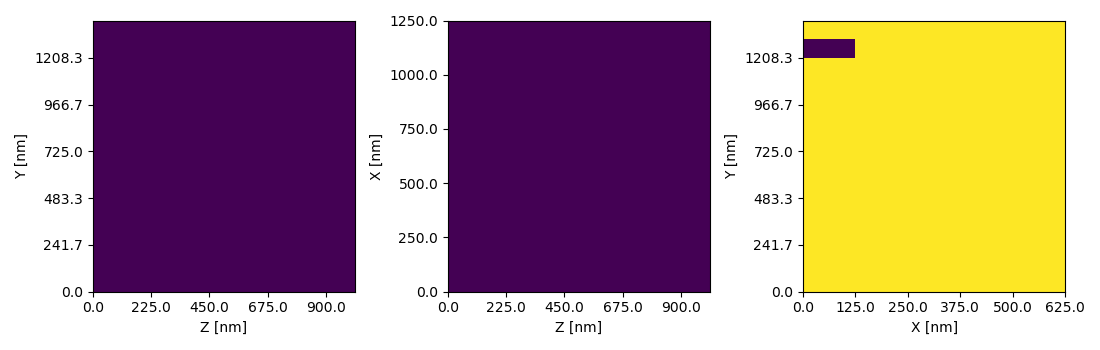

In [104]:
y_plot_offset = 0
if True: 
    fig = plt.figure(figsize=(11, 3.5))
    
    ax = plt.subplot(131)
    idx = int(np.shape(sample)[0]/2)
    plt.pcolormesh(sample[idx, :, :]#.transpose(), origin='lower', 
               # extent=[-wave_prop_dist/2/1e5, wave_prop_dist/2/1e5, 
               #         -wave_prop_size[1]/2 * wave_grid_step[1] / 1e3, 
               #          wave_prop_size[1]/2 * wave_grid_step[1] / 1e3]
              )
    # plt.ylim([-5, 5])
    plt.xlabel('Z [nm]')
    plt.ylabel('Y [nm]')
    xlabs = ax.get_xticklabels()
    ylabs = ax.get_yticklabels()
    print(xlabs)
    print(ylabs)
    labx = np.round(np.linspace(0, (sample.shape[2])*wave_grid_step[0],len(xlabs)),1)
    laby = np.round(np.linspace(0, (sample.shape[1])*wave_grid_step[1],len(ylabs)),1)
    ax.set_xticklabels(labx)
    ax.set_yticklabels(laby)

    # plt.tight_layout()
    
    ax2 = plt.subplot(132)
    idx = int(np.shape(sample)[1]/2 + gau_cen_offset[1]/wave_grid_step[1] + y_plot_offset)
    plt.pcolormesh(sample[:, idx, :]#.transpose()
               #, origin='lower', 
               #extent=[-wave_prop_dist/2/1e5, wave_prop_dist/2/1e5, 
               #        -wave_prop_size[0]/2 * wave_grid_step[0] / 1e3, 
               #         wave_prop_size[0]/2 * wave_grid_step[0] / 1e3]
              )
    # plt.ylim([-5, 5])
    plt.xlabel('Z [nm]')
    plt.ylabel('X [nm]')
    xlabs = ax2.get_xticklabels()
    ylabs = ax2.get_yticklabels()
    labx = np.round(np.linspace(0, (sample.shape[2])*wave_grid_step[0],len(xlabs)),1)
    laby = np.round(np.linspace(0, (sample.shape[0])*wave_grid_step[1],len(ylabs)),1)
    ax2.set_xticklabels(labx)
    ax2.set_yticklabels(laby)

    # plt.tight_layout()
    
    ax3 = plt.subplot(133)
    idx = int(np.shape(sample)[2]/2)
    plt.pcolormesh(sample[:, :, idx].transpose()
              # , origin='lower', 
              # extent=[-wave_prop_size[0]/2 * wave_grid_step[0] / 1e3, 
              #          wave_prop_size[0]/2 * wave_grid_step[0] / 1e3, 
              #         -wave_prop_size[1]/2 * wave_grid_step[1] / 1e3, 
              #          wave_prop_size[1]/2 * wave_grid_step[1] / 1e3]
              )
    # plt.xlim([-5, 5])
    # plt.ylim([-5, 5])
    plt.xlabel('X [nm]')
    plt.ylabel('Y [nm]')
    xlabs = ax3.get_xticklabels()
    ylabs = ax3.get_yticklabels()
    labx = np.round(np.linspace(0, (sample.shape[0])*wave_grid_step[0],len(xlabs)),1)
    laby = np.round(np.linspace(0, (sample.shape[1])*wave_grid_step[1],len(ylabs)),1)
    ax3.set_xticklabels(labx)
    ax3.set_yticklabels(laby)
    
    selector = RectangleSelector(ax3,clicker,useblit = True,button = [1,3],spancoords = 'pixels',interactive = True)
    fig.canvas.mpl_connect('key_press_event',toggler)

    plt.tight_layout()
del y_plot_offset

In [69]:
sample = sample.transpose((2,0,1))

## Wave propagation

In [105]:
# Simulation parameters 
wf_in = wf_bp.copy()
flag_subonly = False

print('wave_prop_size: ', wave_prop_size)
print('wave_prop_dist: %f [nm]' %wave_prop_dist)
print('wave_prop_step: %f [nm]' %wave_prop_step)
print('dist_to_focal: %f [nm]' %dist_to_focal)
print('wave_grid_step: [%f, %f] [nm]' %(tuple(wave_grid_step)))
''' ---------- Ignore for now ---------- '''
farf_prop_size = [2000, 2000]
wave_len = 1.2398 / photonE   # [nm]

flag_mask_beam = False   # whether mask out the direct beam 
# Keep flag_mask_beam = False, otherwise normalization is not correct
flag_bin_result = False   # whether bin the diffraction pattern at farfield 
bin_size = [5, 5]   # size of binning 
flag_crop_result = False   # whether crop the diffraction pattern at farfield 
result_size = [2001,2001]   # size of cropped result
''' ---------- Ignore for now ---------- '''

wave_prop_size:  [29, 45]
wave_prop_dist: 200000.000000 [nm]
wave_prop_step: 100.000000 [nm]
dist_to_focal: -100000.000000 [nm]
wave_grid_step: [25.000000, 50.000000] [nm]


' ---------- Ignore for now ---------- '

In [106]:
# Propagation parameters 
print('Photon energy is %.3f keV ' %photonE)
element_Z = np.asarray([14])   # 13 - Al, 14 - Si, 24 - Cr, 29 - Cu, 74 - W, 79 - Au
print('sample array shape: ', np.shape(sample))
print('wf_in array shape: ', np.shape(wf_in))

Photon energy is 5.000 keV 
sample array shape:  (25, 29, 45)
wf_in array shape:  (29, 45)


In [107]:
# Propagation - multiple elements 
rec_ratio = 20 #Save 1 every 20 images
flag_lowthres = False

wave_vec = 2*np.pi/wave_len   # [nm-1]
density = np.zeros(np.shape(element_Z))
delta = np.zeros(np.shape(element_Z))
beta  = np.zeros(np.shape(element_Z))

for i in range(len(element_Z)): 
    if True: # Get refractive index from database
        density[i] = xb.ElementDensity(element_Z[i])   # [g/cm3]
        # Index of Refraction = (1-delta) - i(beta)
        delta[i] = 1 - xb.Refractive_Index_Re(xb.AtomicNumberToSymbol(element_Z[i]), photonE, density[i])
        beta[i]  = xb.Refractive_Index_Im(xb.AtomicNumberToSymbol(element_Z[i]), photonE, density[i])
    else: # manually define refractive index 
        density[i] = 3.0
        delta[i] = -0.5
        beta[i] = 0.0
print('Started ' + strftime('%H:%M:%S', localtime()) )
P = np.shape(sample)[0]
if not np.array_equal(np.shape(wf_in), wave_prop_size):  
    wf_temp = Array_zeropad_2D(wf_in, AddTo=wave_prop_size)
else: 
    wf_temp = np.copy(wf_in)
wf_rec = np.zeros((int(P/rec_ratio)+1, wave_prop_size[0], wave_prop_size[1])).astype('complex128')
wf_rec[0] = wf_temp
# Actual propagation part
for ii in range(P): # loop for slices
    print('Propagating %d / %d   ' %(ii+1, P) + strftime('%H:%M:%S', localtime()), end='\r')
    sample_temp = Array_zeropad_2D(sample[ii, :,:], AddTo=wave_prop_size)
    # photon-matter interaction
    for i in range(len(element_Z)): # loop elements 
        sample_elem = (sample_temp == (i+1))
        # attenuation 
        sample_abs = np.exp(- wave_vec * beta[i] * sample_elem * wave_prop_step)
        wf_temp *= sample_abs
        # phase delay 
        sample_phd = np.exp(-1j * wave_vec * delta[i] * sample_elem * wave_prop_step)
        wf_temp *= sample_phd
        del sample_elem, sample_abs, sample_phd
    # wave propagation in free space
    wf_temp = wavefront_propagator_angspc(wf_temp, dist_z=wave_prop_step, grid_size=wave_grid_step, 
                                          wave_len=wave_len, pad_size=wave_prop_size, lowthres=1.0, 
                                          flag_cropout=False, flag_norm=False, flag_lowthres=flag_lowthres)
    if np.remainder(ii+1, rec_ratio) == 0: 
        wf_rec[int((ii+1)/rec_ratio)] = wf_temp
print('Finished    %d / %d   ' %(ii+1, P) + strftime('%H:%M:%S', localtime()))
wf_rec = wf_rec.transpose(1,2,0)
print(np.shape(wf_rec))
if True: 
    if flag_subonly: 
        Save_tif(np.abs(wf_rec), 'wf_rec_subonly_amp.tif', OverWrite=True)
        Save_tif(np.angle(wf_rec), 'wf_rec_subonly_ph.tif', OverWrite=True)
    else: 
        Save_tif(np.abs(wf_rec), 'wf_rec_pillars_amp.tif', OverWrite=True)
        Save_tif(np.angle(wf_rec), 'wf_rec_pillars_ph.tif', OverWrite=True)
del wf_temp, P, sample_temp
# del wf_rec

Started 15:36:49
Finished    25 / 25   15:36:49
(29, 45, 2)
>>>>>> Error! File already exists. 
>>>>>> Existing file is overwritten! 
>>>>>> Error! File already exists. 
>>>>>> Existing file is overwritten! 


In [108]:
print(np.shape(wf_rec))
print(np.shape(wf_rec.transpose(1,2,0)))

(29, 45, 2)
(45, 2, 29)


In [109]:
''' # for reading only
# Propagation - single element 
wave_vec = 2*np.pi/wave_len   # [nm-1]
density = xb.ElementDensity(element_Z)   # [g/cm3]
# Index of Refraction = (1-delta) - i(beta)
delta = 1 - xb.Refractive_Index_Re(xb.AtomicNumberToSymbol(element_Z), photonE, density)
beta  = xb.Refractive_Index_Im(xb.AtomicNumberToSymbol(element_Z), photonE, density)

print('Started ' + strftime('%H:%M:%S', localtime()) )

P = np.shape(sample)[0]
if not np.array_equal(np.shape(wf_in), wave_prop_size):  
    wf_temp = Array_zeropad_2D(wf_in, AddTo=wave_prop_size)
else: 
    wf_temp = np.copy(wf_in)
wf_rec = np.zeros((int(P/10)+1, wave_prop_size[0], wave_prop_size[1])).astype('complex128')
wf_rec[0] = wf_temp
for ii in range(P): 
    print('Propagating %d / %d   ' %(ii+1, P) + strftime('%H:%M:%S', localtime()), end='\r')
    sample_temp = Array_zeropad_2D(sample[ii, :,:]*wave_prop_step, AddTo=wave_prop_size)
    # attenuation 
    sample_abs = np.exp(- wave_vec * beta * sample_temp)
    wf_temp *= sample_abs
    # phase delay 
    sample_phd = np.exp(-1j * wave_vec * delta * sample_temp)
    wf_temp *= sample_phd
    # propagation 
    wf_temp = wavefront_propagator_angspc(wf_temp, dist_z=wave_prop_step, grid_size=wave_grid_step, 
                                          wave_len=wave_len, pad_size=wave_prop_size, flag_cropout=False)
    if np.remainder(ii+1, 10) == 0: 
        wf_rec[int((ii+1)/10)] = wf_temp
print('Finished    %d / %d   ' %(ii+1, P) + strftime('%H:%M:%S', localtime()))
print(np.shape(wf_rec))
if True: 
    Save_tif(np.abs(wf_rec), 'wf_rec_subonly_amp.tif', OverWrite=True)
    Save_tif(np.angle(wf_rec), 'wf_rec_subonly_ph.tif', OverWrite=True)
del wf_temp, wf_rec, P, sample_temp
'''

" # for reading only\n# Propagation - single element \nwave_vec = 2*np.pi/wave_len   # [nm-1]\ndensity = xb.ElementDensity(element_Z)   # [g/cm3]\n# Index of Refraction = (1-delta) - i(beta)\ndelta = 1 - xb.Refractive_Index_Re(xb.AtomicNumberToSymbol(element_Z), photonE, density)\nbeta  = xb.Refractive_Index_Im(xb.AtomicNumberToSymbol(element_Z), photonE, density)\n\nprint('Started ' + strftime('%H:%M:%S', localtime()) )\n\nP = np.shape(sample)[0]\nif not np.array_equal(np.shape(wf_in), wave_prop_size):  \n    wf_temp = Array_zeropad_2D(wf_in, AddTo=wave_prop_size)\nelse: \n    wf_temp = np.copy(wf_in)\nwf_rec = np.zeros((int(P/10)+1, wave_prop_size[0], wave_prop_size[1])).astype('complex128')\nwf_rec[0] = wf_temp\nfor ii in range(P): \n    print('Propagating %d / %d   ' %(ii+1, P) + strftime('%H:%M:%S', localtime()), end='\r')\n    sample_temp = Array_zeropad_2D(sample[ii, :,:]*wave_prop_step, AddTo=wave_prop_size)\n    # attenuation \n    sample_abs = np.exp(- wave_vec * beta * sampl

In [110]:
# skip for now
# propagate to farfield 
if flag_subonly: 
    print('Load wf_rec_subonly_*')
    wf_nearfield_amp = Read_tif('wf_rec_subonly_amp.tif')[:,:,-1]
    wf_nearfield_ph  = Read_tif('wf_rec_subonly_ph.tif')[:,:,-1]
else: 
    print('Load wf_rec_pillars_*')
    wf_nearfield_amp = Read_tif('wf_rec_pillars_amp.tif')[:,:,-1]
    wf_nearfield_ph  = Read_tif('wf_rec_pillars_ph.tif')[:,:,-1]
wf_nearfield = wf_nearfield_amp * np.exp(-1j * wf_nearfield_ph)

wf_farfield = sp.fft.fftshift(sp.fft.fft2(Array_zeropad_2D(wf_nearfield, AddTo=farf_prop_size)))
# normalized FFT output
wf_farfield /= np.sqrt(np.product(np.shape(wf_farfield)))
# modify farfield image and save to result 
intensity_farfield = np.abs(wf_farfield * np.conjugate(wf_farfield))
if flag_bin_result: 
    intensity_farfield = Array_binning(intensity_farfield[:-1, :-1], Bin=bin_size)
if flag_crop_result: 
    intensity_farfield = Array_crop_2D(intensity_farfield, CropTo=result_size)
# mask direct beam
if flag_mask_beam: 
    center = (np.asarray(np.shape(intensity_farfield))/2).astype('int')
    intensity_farfield[center[0]-25 : center[0]+25, 
                       center[1]-25 : center[1]+25] = 0 
print(np.shape(intensity_farfield))
farf_q_step = 2 * np.pi / np.asarray(wave_grid_step) / (np.asarray(farf_prop_size)-1)
print(farf_q_step)
if flag_bin_result: 
     farf_q_step *= np.asarray(bin_size)
qx_ax = (np.arange(np.shape(intensity_farfield)[0]) - np.shape(intensity_farfield)[0]/2) * farf_q_step[0]
qy_ax = (np.arange(np.shape(intensity_farfield)[1]) - np.shape(intensity_farfield)[1]/2) * farf_q_step[1]
wave_vec = 2*np.pi/wave_len   # [nm-1]
ax_ax = np.rad2deg(np.arctan(qx_ax / wave_vec))
ay_ax = np.rad2deg(np.arctan(qy_ax / wave_vec))

Load wf_rec_pillars_*
(2000, 2000)
[1.25726569e-04 6.28632847e-05]


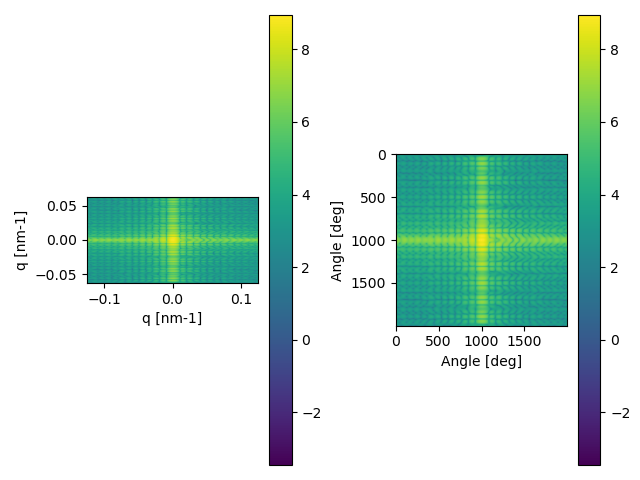

In [111]:
# farfield result visualization, skip for now

center = np.unravel_index(np.argmax(intensity_farfield), np.shape(intensity_farfield)) 
intensity_farfield_b3_24_18fov_design_samp2 = intensity_farfield.copy()
#print(np.shape(intensity_farfield_b3_32_18fov))
if False: 
    intensity_farfield_control[center[0]-400 : center[0]+400, 
                          center[1]-50 : center[1]+50] = 0

plt.figure()
plt.subplot(121)
plt.imshow(np.log10(intensity_farfield_b3_24_18fov_design_samp)#.transpose()
           , 
           extent=[np.min(qx_ax), np.max(qx_ax), 
                   np.min(qy_ax), np.max(qy_ax)])   # np.log10   , vmin=-1, vmax=2    
# plt.xlim([-0.05, 0.05])
#plt.ylim([-0.1, 1.0])
plt.xlabel('q [nm-1]'); plt.ylabel('q [nm-1]');
ax = plt.gca()
ax.set_aspect(1.0)
plt.colorbar()

plt.subplot(122)
plt.imshow(np.log10(intensity_farfield_b3_24_18fov_design_samp)#.transpose()
           #, 
           #extent=[np.min(ax_ax), np.max(ax_ax), 
           #        np.min(ay_ax), np.max(ay_ax)]
          )   # np.log10   , vmin=-1, vmax=2    
# plt.xlim([-0.05, 0.05])
#plt.ylim([-0.1, 2.0])
plt.xlabel('Angle [deg]'); plt.ylabel('Angle [deg]');
ax = plt.gca()
ax.set_aspect(1.0)
plt.colorbar()

plt.tight_layout()


[Text(-0.08, 0, '−0.08'), Text(-0.06, 0, '−0.06'), Text(-0.04, 0, '−0.04'), Text(-0.020000000000000004, 0, '−0.02'), Text(0.0, 0, '0.00'), Text(0.020000000000000004, 0, '0.02'), Text(0.039999999999999994, 0, '0.04'), Text(0.06000000000000001, 0, '0.06'), Text(0.08, 0, '0.08')]
[Text(0, -8.0, '−8'), Text(0, -6.0, '−6'), Text(0, -4.0, '−4'), Text(0, -2.0, '−2'), Text(0, 0.0, '0'), Text(0, 2.0, '2'), Text(0, 4.0, '4'), Text(0, 6.0, '6'), Text(0, 8.0, '8')]


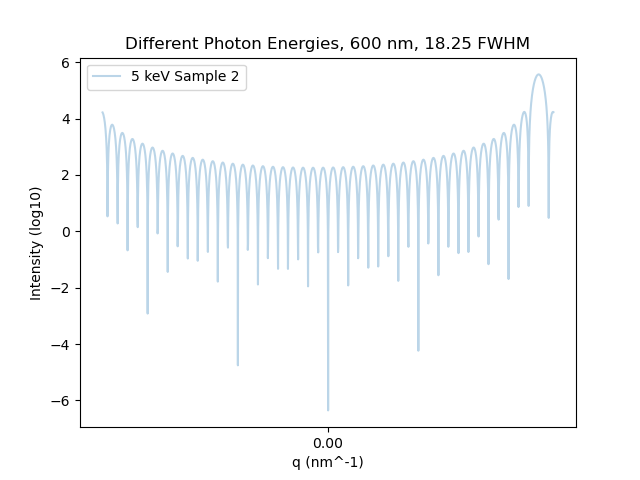

In [112]:
ax = plt.figure().add_subplot()
#plt.plot(qx_ax,np.log10(intensity_farfield_b[:,700]),label = 'Small bridge')
#plt.plot(qx_ax,np.log10(intensity_farfield_control[:,700]),label = 'Control',alpha = 0.5) #Use this
#plt.plot(qx_ax,np.log10(intensity_farfield_b[:,700]),label = 'Small bridge')
#plt.plot(qy_ax,np.log10(intensity_farfield_b3_8_18fov[1500,:]),label = '200 nm',alpha = 1)
#plt.plot(qy_ax,np.log10(intensity_farfield_b3_16_18fov[1500,:]),label = '400 nm',alpha = 0.3)
#plt.plot(qy_ax,np.log10(intensity_farfield_b3_24_18fov_1[1500,:]),label = '1 keV',alpha = 0.9)
#plt.plot(qy_ax,np.log10(intensity_farfield_b3_24_18fov_1_8[1500,:]),label = '1.8 keV',alpha = 0.7)
#plt.plot(qy_ax,np.log10(intensity_farfield_b3_24_18fov_1_9[1500,:]),label = '1.9 keV',alpha = 0.5)
#plt.plot(qy_ax,np.log10(intensity_farfield_b3_24_18fov_design_samp[1000,:]),label = '5 keV',alpha = 0.3)
plt.plot(qy_ax,np.log10(intensity_farfield_b3_24_18fov_design_samp2[1000,:]),label = '5 keV Sample 2',alpha = 0.3)
#plt.plot(qy_ax,np.log10(intensity_farfield_b3_32_18fov[1500,:]),label = '800 nm',alpha = 0.5)
#plt.plot(qy_ax,np.log10(intensity_farfield_b3_40_18fov[1500,:]),label = '1000 nm',alpha = 0.3)
#plt.plot(qy_ax,np.log10(intensity_farfield_b3_24_18fov_5degx[1500,:]),label = '5 deg x-axis',alpha = 1)
#plt.plot(qy_ax,np.log10(intensity_farfield_b3_24_18fov_5degy[850,:]),label = '5 deg y-axis',alpha = 1)
#plt.plot(qx_ax,np.log10(intensity_farfield_b3_5degy[:,500]),label = '5 deg y-axis',alpha = 0.5)
#plt.plot(qx_ax,np.log10(intensity_farfield_b3_40[:,500])+120,label = '1000 mn',alpha = 1)
#plt.plot(qx_ax,np.log10(intensity_farfield_b3_48[:,500])+150,label = '1200 mn',alpha = 1)
#plt.plot(qx_ax,np.log10(intensity_farfield_control[:,700]),label = 'Control',alpha = 0.5)
xlabs = ax.get_xticklabels()
ylabs = ax.get_yticklabels()
print(xlabs)
print(ylabs)
labx = np.round(qy_ax,2)
#laby = np.round(np.linspace(-(temp.shape[1])*wave_grid_step[1]/2 - (temp.shape[1])*wave_grid_step[1]/(len(xlabs)-2), (temp.shape[1])*wave_grid_step[1]/2,len(xlabs)),1)
ax.set_xticks(labx)
#ax.set_yticklabels(laby)
plt.ylabel('Intensity (log10)')
plt.xlabel('q (nm^-1)')
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.13))
plt.legend()
plt.title('Different Photon Energies, 600 nm, 18.25 FWHM')
plt.show()

In [119]:
project = sum(sample)
project

array([[25., 25., 25., ..., 25., 25., 25.],
       [25., 25., 25., ..., 25., 25., 25.],
       [25., 25., 25., ..., 25., 25., 25.],
       ...,
       [20., 20., 20., ..., 20., 20., 20.],
       [25., 25., 25., ..., 25., 25., 25.],
       [25., 25., 25., ..., 25., 25., 25.]])

In [150]:
res = np.fft.fftshift(np.fft.fft2(project))

In [152]:
np.shape(res)

(29, 45)

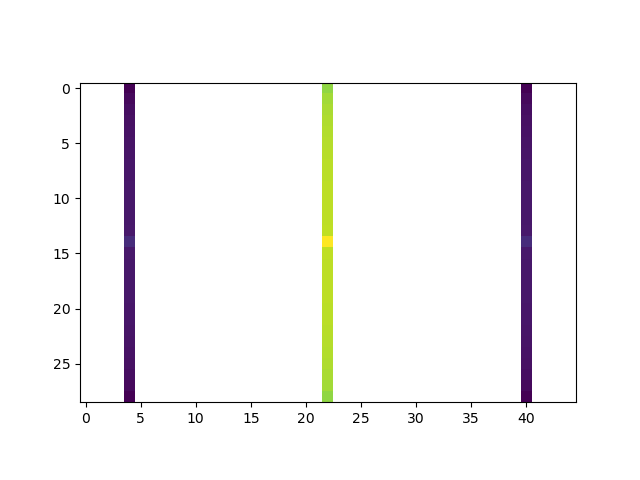

In [155]:
plt.clf()
plt.imshow(np.log10(np.abs(res)))
plt.show()

In [141]:
plt.clf()

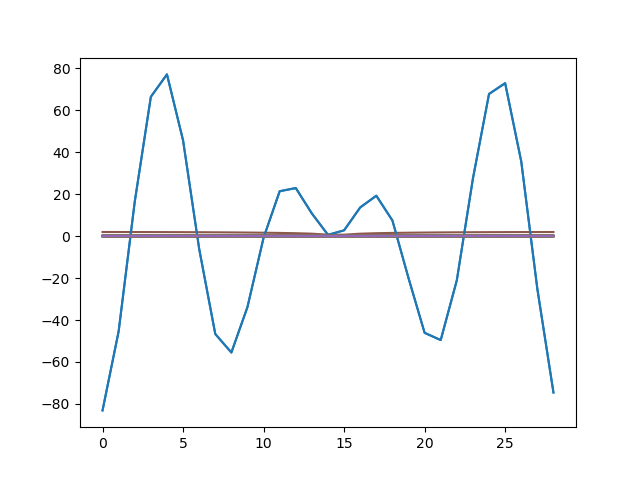

In [144]:
res3d = np.fft.fftn(sample)
plt.plot((res3d[12,:,:]))
plt.show()

## Result visualization

In [328]:
if True: 
    if flag_subonly: 
        print('Load wf_rec_subonly_*')
        wf_rec_amp = Read_tif('wf_rec_subonly_amp.tif')
        wf_rec_ph = Read_tif('wf_rec_subonly_ph.tif')
    else: 
        print('Load wf_rec_pillars_*')
        wf_rec_amp = Read_tif('wf_rec_pillars_amp.tif')
        wf_rec_ph = Read_tif('wf_rec_pillars_ph.tif')
else: 
    wf_rec_amp = np.abs(wf_rec)
    wf_rec_ph  = np.angle(wf_rec)
print(np.shape(wf_rec_amp))
print(np.shape(wf_rec_ph))
print(np.shape(sample))

Load wf_rec_pillars_*
(1000, 900, 25)
(1000, 900, 25)
(485, 1000, 900)


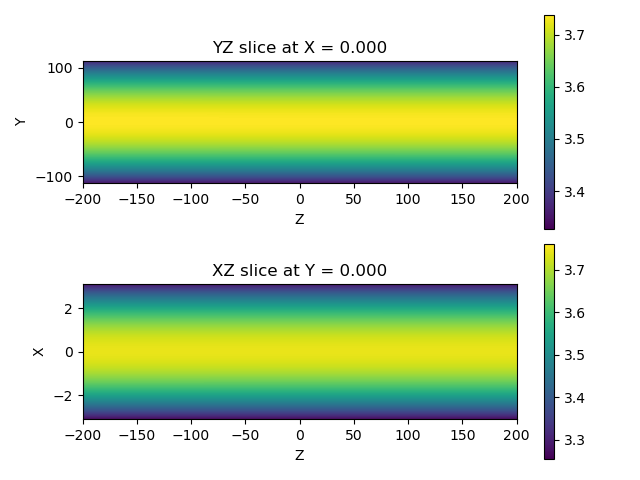

In [329]:
if True:   # 2D plot of wavefront 
    temp = wf_rec_amp
    lim_region = False
    plot_region = [-60, 60, -10, 10]
    
    plt.figure()#figsize=(10,4.5))
    plt.subplot(211)
    plt.imshow(np.log10(temp[int(np.shape(temp)[1]/2 + gau_cen_offset[0]/wave_grid_step[0]), :, :])#.transpose()
               , origin='lower', aspect = 0.5,
               extent=[-wave_prop_dist/1e3, wave_prop_dist/1e3, 
                       -np.shape(temp)[1]/2 * wave_grid_step[0] / 1e2, 
                        np.shape(temp)[1]/2 * wave_grid_step[0] / 1e2])
    if lim_region: 
        plt.axis(plot_region)
    plt.colorbar(); plt.title('YZ slice at X = %0.3f' %(gau_cen_offset[1]/1e3))
    plt.ylabel('Y'); plt.xlabel('Z')
    plt.tight_layout()
    plt.subplot(212)
    plt.imshow(np.log10(temp[:, int(np.shape(temp)[1]/2 + gau_cen_offset[0]/wave_grid_step[0]), :])#.transpose()
               , origin='lower', aspect = 20,
               extent=[-wave_prop_dist/1e3, wave_prop_dist/1e3, 
                       -np.shape(temp)[2]/2 * wave_grid_step[1] / 1e2, 
                        np.shape(temp)[2]/2 * wave_grid_step[1] / 1e2])
    if lim_region: 
        plt.axis(plot_region)
    plt.colorbar(); plt.title('XZ slice at Y = %0.3f' %(gau_cen_offset[0]/1e3))
    plt.ylabel('X'); plt.xlabel('Z')
    plt.tight_layout()
    del temp, plot_region, lim_region

[Text(-100.0, 0, '−100'), Text(0.0, 0, '0'), Text(100.0, 0, '100'), Text(200.0, 0, '200'), Text(300.0, 0, '300'), Text(400.0, 0, '400'), Text(500.0, 0, '500'), Text(600.0, 0, '600'), Text(700.0, 0, '700'), Text(800.0, 0, '800'), Text(900.0, 0, '900')]
[Text(0, -200.0, '−200'), Text(0, 0.0, '0'), Text(0, 200.0, '200'), Text(0, 400.0, '400'), Text(0, 600.0, '600'), Text(0, 800.0, '800'), Text(0, 1000.0, '1000')]
[Text(-100.0, 0, '−100'), Text(0.0, 0, '0'), Text(100.0, 0, '100'), Text(200.0, 0, '200'), Text(300.0, 0, '300'), Text(400.0, 0, '400'), Text(500.0, 0, '500'), Text(600.0, 0, '600'), Text(700.0, 0, '700'), Text(800.0, 0, '800'), Text(900.0, 0, '900')]
[Text(0, -200.0, '−200'), Text(0, 0.0, '0'), Text(0, 200.0, '200'), Text(0, 400.0, '400'), Text(0, 600.0, '600'), Text(0, 800.0, '800'), Text(0, 1000.0, '1000')]


/tmp/ipykernel_64624/1238532247.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labx)
/tmp/ipykernel_64624/1238532247.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(laby)
/tmp/ipykernel_64624/1238532247.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(labx)
/tmp/ipykernel_64624/1238532247.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_yticklabels(laby)


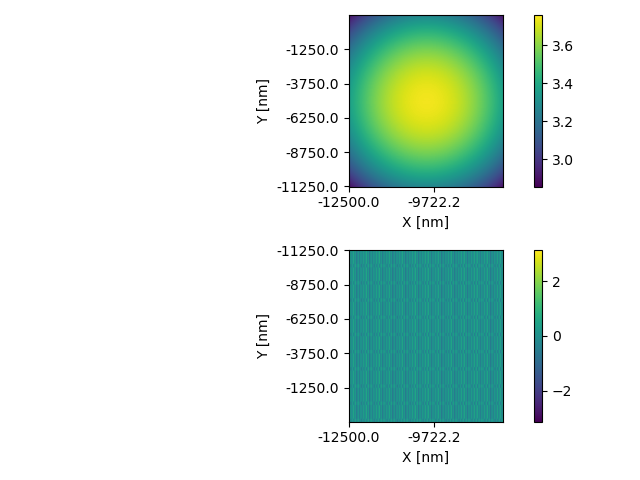

In [337]:
plt.figure()   # figsize = (12,3)
ax = plt.subplot(211)
temp = wf_rec_amp
plt.imshow(np.log10(temp[:, :, 24])#.transpose()
           , origin='lower', aspect=1, 
               #extent=[-wave_prop_dist/1e3, wave_prop_dist/1e3, 
                #       -np.shape(temp)[2]/2 * wave_grid_step[1] / 1e2, 
                 #       np.shape(temp)[2]/2 * wave_grid_step[1] / 1e2]
          )
plt.ylabel('Y [nm]')
plt.xlabel('X [nm]')
xlabs = ax.get_xticklabels()
ylabs = ax.get_yticklabels()
print(xlabs)
print(ylabs)
labx = np.round(np.linspace(-(temp.shape[0])*wave_grid_step[0]/2 - temp.shape[0]*wave_grid_step[0]/(len(xlabs)-2), (temp.shape[0])*wave_grid_step[0]/2,len(xlabs)),1)
laby = np.round(np.linspace(-(temp.shape[1])*wave_grid_step[1]/2 - (temp.shape[1])*wave_grid_step[1]/(len(xlabs)-2), (temp.shape[1])*wave_grid_step[1]/2,len(xlabs)),1)
ax.set_xticklabels(labx)
ax.set_yticklabels(laby)
plt.colorbar();plt.tight_layout()

ax2 = plt.subplot(212)
temp = wf_rec_ph
plt.imshow((temp[:, :, 24])#.transpose(), origin='lower', 
               #extent=[-wave_prop_dist/1e3, wave_prop_dist/1e3, 
                #       -np.shape(temp)[2]/2 * wave_grid_step[1] / 1e2, 
                 #       np.shape(temp)[2]/2 * wave_grid_step[1] / 1e2]
          )
plt.ylabel('Y [nm]')
plt.xlabel('X [nm]')
xlabs = ax2.get_xticklabels()
ylabs = ax2.get_yticklabels()
print(xlabs)
print(ylabs)
ax2.set_xticklabels(labx)
ax2.set_yticklabels(laby)

plt.colorbar();plt.tight_layout()
plt.show()

In [9]:
result = Read_tif('result_ptychoscans_3c_nobs.tif')
print('result size: ', np.shape(result))
result_conv = Read_tif('result_ptychoscans_3c_nobs_conv.tif')
print('result_conv size: ', np.shape(result_conv))
sample_record = Read_tif('sample_record_ptychoscans_3c.tif')
print('sample_record size: ', np.shape(sample_record))

print('Total counts in result: %g' %np.sum(result[0,:,:]))
print('Total counts in result_conv: %g' %np.sum(result_conv[0,:,:]))
print('Ratio between the two: ', np.sum(result_conv[1,:,:])/np.sum(result[1,:,:]))

result size:  (29, 2000, 2000)
result_conv size:  (29, 2000, 2000)
sample_record size:  (29, 5001, 5001)
Total counts in result: 9.95922e+11
Total counts in result_conv: 9.95922e+11
Ratio between the two:  0.9999998736277518


In [27]:
result_conv = np.concatenate([np.concatenate([Read_tif('result_ptychoscans_nobs_conv-1.tif'), 
                                              Read_tif('result_ptychoscans_nobs_conv-2.tif')]), 
                              Read_tif('result_ptychoscans_nobs_conv-3.tif')])
print(np.shape(result_conv))
result_ref = Read_tif('result_ptychoscans_ref_nobs_conv.tif')

(29, 2000, 2000)


In [28]:
# result_ref = result_conv[:10,:,:].copy()
result_conv = np.random.poisson(result_conv)
# Save_tif(result_ref, 'result_ptychoscans_ref_nobs.tif', OverWrite=True)

In [29]:
for i in range(np.shape(result_conv)[0]): 
    temp = Array_radial_integration_2D(result_conv[i,:,:])
    if i == 0: 
        result_conv_intax = np.zeros((np.shape(result_conv)[0], np.size(temp['result'])))
        result_conv_int = np.zeros_like(result_conv_intax)
    result_conv_intax[i, :] = temp['bins'][:-1]
    result_conv_int[i, :] = temp['result']
for i in range(np.shape(result_ref)[0]): 
    temp = Array_radial_integration_2D(result_ref[i,:,:])
    if i == 0: 
        result_ref_intax = np.zeros((np.shape(result_ref)[0], np.size(temp['result'])))
        result_ref_int = np.zeros_like(result_ref_intax)
    result_ref_intax[i, :] = temp['bins'][:-1]
    result_ref_int[i, :] = temp['result']

result_conv_intdiff = np.zeros_like(result_conv_intax)
for i in range(10): 
    result_conv_intdiff[i, :]    = result_conv_int[i, :]    - result_ref_int[i, :]
    result_conv_intdiff[i+10, :] = result_conv_int[i+10, :] - result_ref_int[i, :]
    if i != 9: 
        result_conv_intdiff[i+20, :] = result_conv_int[i+20, :] - result_ref_int[i, :]

In [30]:
q_ax = result_conv_intax[0] / grid_size[1] / (farf_prop_size[1]-1) * bin_size[1] * 1000

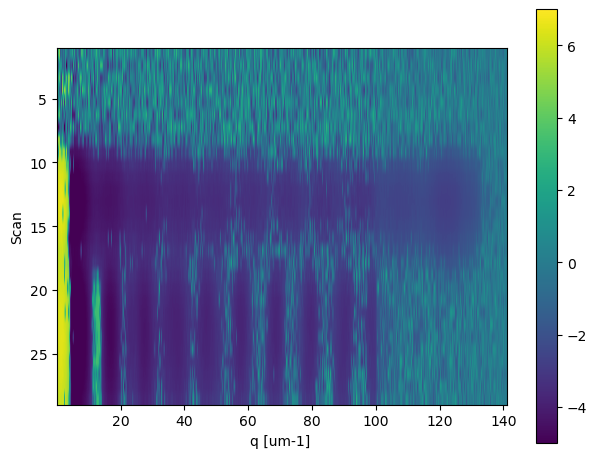

In [31]:
plt.figure()
temp = np.sign(result_conv_intdiff)*np.log10(1+np.abs(result_conv_intdiff))
plt.imshow(temp, extent=[np.min(q_ax), np.max(q_ax), 29, 1], aspect=4, vmin=-5, vmax=7)
plt.colorbar()
plt.xlabel('q [um-1] ')
plt.ylabel('Scan')
plt.tight_layout()